# Running correlations beteween gene expression and OTU abundance


## Filtering lowly expressed genes and lowly abundant OTUs

 * Remove genes with less than one mapped read per million reads in at least 80% of samples ([Johnson and Krishnan, 2022](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-021-02568-9))
 * Retaining OTUs found at 0.001 relative abundance in at least 10% of the samples ([Priya et al 2022](https://www.nature.com/articles/s41564-022-01121-z))

### Filtering genes

Since RPKM will be used to filter out genes with low expression, it must be imported first:

In [51]:
import pandas as pd

#kremling_expression_v5_day_rpkm = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_rpkm.tsv',
kremling_expression_v5_day_rpkm = pd.read_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_rpkm.tsv',
                            sep='\t')
kremling_expression_v5_day_rpkm.set_index('Name', inplace=True)

#kremling_expression_v5_night_rpkm = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_rpkm.tsv',
kremling_expression_v5_night_rpkm = pd.read_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_rpkm.tsv',
                            sep='\t')
kremling_expression_v5_night_rpkm.set_index('Name', inplace=True)

These are the genes to be used in filtering steps:

In [52]:
genes_tokeep_day = kremling_expression_v5_day_rpkm[(kremling_expression_v5_day_rpkm > 1).sum(axis=1) >= (kremling_expression_v5_day_rpkm.shape[1] * 0.8)].index
genes_tokeep_night = kremling_expression_v5_night_rpkm[(kremling_expression_v5_night_rpkm > 1).sum(axis=1) >= (kremling_expression_v5_night_rpkm.shape[1] * 0.8)].index
print('Genes to keep in day:', len(genes_tokeep_day))
print('Genes to keep in night:', len(genes_tokeep_night))

Genes to keep in day: 13107
Genes to keep in night: 13630


Filtering RPKM:

In [53]:
kremling_expression_v5_day_rpkm_filtered = kremling_expression_v5_day_rpkm[(kremling_expression_v5_day_rpkm > 1).sum(axis=1) >= (kremling_expression_v5_day_rpkm.shape[1] * 0.8)]
kremling_expression_v5_night_rpkm_filtered = kremling_expression_v5_night_rpkm[(kremling_expression_v5_night_rpkm > 1).sum(axis=1) >= (kremling_expression_v5_night_rpkm.shape[1] * 0.8)]

Importing the TPM, CPM, TMM, UQ, CTF and CUF matrices and filter genes:

In [54]:
kremling_expression_v5_day_tpm = pd.read_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_tpm.tsv',
#kremling_expression_v5_day_tpm = pd.read_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_tpm.tsv',
                            sep='\t')
kremling_expression_v5_day_tpm.set_index('Name', inplace=True)

#kremling_expression_v5_night_tpm = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_tpm.tsv',
kremling_expression_v5_night_tpm = pd.read_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_tpm.tsv',
                            sep='\t')
kremling_expression_v5_night_tpm.set_index('Name', inplace=True)

kremling_expression_v5_day_tpm_filtered = kremling_expression_v5_day_tpm[kremling_expression_v5_day_tpm.index.isin(genes_tokeep_day)]
kremling_expression_v5_night_tpm_filtered = kremling_expression_v5_night_tpm[kremling_expression_v5_night_tpm.index.isin(genes_tokeep_night)]

#kremling_expression_v5_day_cpm = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_cpm.tsv',
kremling_expression_v5_day_cpm = pd.read_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_cpm.tsv',
                            sep='\t')
kremling_expression_v5_day_cpm.set_index('Name', inplace=True)

#kremling_expression_v5_night_cpm = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_cpm.tsv',
kremling_expression_v5_night_cpm = pd.read_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_cpm.tsv',
                            sep='\t')
kremling_expression_v5_night_cpm.set_index('Name', inplace=True)

kremling_expression_v5_day_cpm_filtered = kremling_expression_v5_day_cpm[kremling_expression_v5_day_cpm.index.isin(genes_tokeep_day)]
kremling_expression_v5_night_cpm_filtered = kremling_expression_v5_night_cpm[kremling_expression_v5_night_cpm.index.isin(genes_tokeep_night)]

#kremling_expression_v5_day_tmm = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_tmm.tsv',
kremling_expression_v5_day_tmm = pd.read_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_tmm.tsv',
                            sep='\t')
kremling_expression_v5_day_tmm.set_index('Name', inplace=True)

#kremling_expression_v5_night_tmm = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_tmm.tsv',
kremling_expression_v5_night_tmm = pd.read_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_tmm.tsv',
                            sep='\t')
kremling_expression_v5_night_tmm.set_index('Name', inplace=True)

kremling_expression_v5_day_tmm_filtered = kremling_expression_v5_day_tmm[kremling_expression_v5_day_tmm.index.isin(genes_tokeep_day)]
kremling_expression_v5_night_tmm_filtered = kremling_expression_v5_night_tmm[kremling_expression_v5_night_tmm.index.isin(genes_tokeep_night)]

#kremling_expression_v5_day_uq = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_uq.tsv',
kremling_expression_v5_day_uq = pd.read_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_uq.tsv',
                            sep='\t')
kremling_expression_v5_day_uq.set_index('Name', inplace=True)

#kremling_expression_v5_night_uq = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_uq.tsv',
kremling_expression_v5_night_uq = pd.read_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_uq.tsv',
                            sep='\t')
kremling_expression_v5_night_uq.set_index('Name', inplace=True)

kremling_expression_v5_day_uq_filtered = kremling_expression_v5_day_uq[kremling_expression_v5_day_uq.index.isin(genes_tokeep_day)]
kremling_expression_v5_night_uq_filtered = kremling_expression_v5_night_uq[kremling_expression_v5_night_uq.index.isin(genes_tokeep_night)]

#kremling_expression_v5_day_ctf = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_ctf.tsv',
kremling_expression_v5_day_ctf = pd.read_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_ctf.tsv',
                            sep='\t')
kremling_expression_v5_day_ctf.set_index('Name', inplace=True)

#kremling_expression_v5_night_ctf = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_ctf.tsv',
kremling_expression_v5_night_ctf = pd.read_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_ctf.tsv',
                            sep='\t')
kremling_expression_v5_night_ctf.set_index('Name', inplace=True)

kremling_expression_v5_day_ctf_filtered = kremling_expression_v5_day_ctf[kremling_expression_v5_day_ctf.index.isin(genes_tokeep_day)]
kremling_expression_v5_night_ctf_filtered = kremling_expression_v5_night_ctf[kremling_expression_v5_night_ctf.index.isin(genes_tokeep_night)]

#kremling_expression_v5_day_cuf = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_cuf.tsv',
kremling_expression_v5_day_cuf = pd.read_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_cuf.tsv',
                            sep='\t')
kremling_expression_v5_day_cuf.set_index('Name', inplace=True)

#kremling_expression_v5_night_cuf = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_cuf.tsv',
kremling_expression_v5_night_cuf = pd.read_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_cuf.tsv',
                            sep='\t')
kremling_expression_v5_night_cuf.set_index('Name', inplace=True)

kremling_expression_v5_day_cuf_filtered = kremling_expression_v5_day_cuf[kremling_expression_v5_day_cuf.index.isin(genes_tokeep_day)]
kremling_expression_v5_night_cuf_filtered = kremling_expression_v5_night_cuf[kremling_expression_v5_night_cuf.index.isin(genes_tokeep_night)]

### Filtering OTUs

Since relative abundance will be used to filter out genes with low expression, it must be imported first:

In [55]:
import pandas as pd

#otu_table_merged_day_relative_abund = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/16S_wallace2018/combine_day_night_samples/summed_day_night_otu_day_relative_abund.tsv',
otu_table_merged_day_relative_abund = pd.read_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/16S_wallace2018/combine_day_night_samples/summed_day_night_otu_day_relative_abund.tsv',
                            sep='\t')
otu_table_merged_day_relative_abund.set_index('OTU ID', inplace=True)

otu_table_merged_night_relative_abund = pd.read_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/16S_wallace2018/combine_day_night_samples/summed_day_night_otu_night_relative_abund.tsv',
#otu_table_merged_night_relative_abund = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/16S_wallace2018/combine_day_night_samples/summed_day_night_otu_night_relative_abund.tsv',
                            sep='\t')
otu_table_merged_night_relative_abund.set_index('OTU ID', inplace=True)

In [56]:
otus_tokeep_day = otu_table_merged_day_relative_abund[(otu_table_merged_day_relative_abund > 0.001).sum(axis=1) >= (otu_table_merged_day_relative_abund.shape[1] * 0.1)].index
otus_tokeep_night = otu_table_merged_night_relative_abund[(otu_table_merged_night_relative_abund > 0.001).sum(axis=1) >= (otu_table_merged_night_relative_abund.shape[1] * 0.1)].index

OTU matrices with relative abundances are filtered (based on relative abundance) for correlations:

In [57]:
otu_table_merged_day_relative_abund_filtered = otu_table_merged_day_relative_abund[otu_table_merged_day_relative_abund.index.isin(otus_tokeep_day)]
otu_table_merged_night_relative_abund_filtered = otu_table_merged_night_relative_abund[otu_table_merged_night_relative_abund.index.isin(otus_tokeep_night)]

In [58]:
print(otu_table_merged_day_relative_abund_filtered.shape)
print(otu_table_merged_night_relative_abund_filtered.shape)

(3681, 176)
(3712, 228)


In [59]:
#otu_table_merged_day_relative_abund_filtered.to_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/16S_wallace2018/combine_day_night_samples/otu_table_merged_day_relative_abund_filtered.tsv',
otu_table_merged_day_relative_abund_filtered.to_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/16S_wallace2018/combine_day_night_samples/otu_table_merged_day_relative_abund_filtered.tsv',
                            sep='\t')
#otu_table_merged_night_relative_abund_filtered.to_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/16S_wallace2018/combine_day_night_samples/otu_table_merged_night_relative_abund_filtered.tsv',
otu_table_merged_night_relative_abund_filtered.to_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/16S_wallace2018/combine_day_night_samples/otu_table_merged_night_relative_abund_filtered.tsv',
                            sep='\t')

Importing the OTU CPM matrices and filter OTUs:

In [60]:
#otu_table_merged_day_cpm = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/16S_wallace2018/combine_day_night_samples/summed_d_n_otu_day_cpm.tsv',
otu_table_merged_day_cpm = pd.read_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/16S_wallace2018/combine_day_night_samples/summed_d_n_otu_day_cpm.tsv',
                            sep='\t')
otu_table_merged_day_cpm.set_index('OTU ID', inplace=True)

#otu_table_merged_night_cpm = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/16S_wallace2018/combine_day_night_samples/summed_d_n_otu_night_cpm.tsv',
otu_table_merged_night_cpm = pd.read_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/16S_wallace2018/combine_day_night_samples/summed_d_n_otu_night_cpm.tsv',
                            sep='\t')
otu_table_merged_night_cpm.set_index('OTU ID', inplace=True)

OTU matrices are filtered based on relative abundance:

In [61]:
otu_table_merged_day_cpm_filtered = otu_table_merged_day_cpm[otu_table_merged_day_cpm.index.isin(otus_tokeep_day)]
otu_table_merged_night_cpm_filtered = otu_table_merged_night_cpm[otu_table_merged_night_cpm.index.isin(otus_tokeep_night)]

In [62]:
print(otu_table_merged_day_cpm_filtered.shape)
print(otu_table_merged_night_cpm_filtered.shape)

(3681, 176)
(3712, 228)


Importing the OTU counts matrices and filter OTUs:

In [63]:
#otu_table_merged_counts = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/16S_wallace2018/combine_day_night_samples/summed_day_night_otu_counts.tsv',
otu_table_merged_counts = pd.read_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/16S_wallace2018/combine_day_night_samples/summed_day_night_otu_counts.tsv',
                            sep='\t')
otu_table_merged_counts.set_index('OTU ID', inplace=True)

OTU matrices are filtered based on day and night samples:

In [64]:
otu_table_merged_counts_day = otu_table_merged_counts[otu_table_merged_day_cpm_filtered.columns]
otu_table_merged_counts_night = otu_table_merged_counts[otu_table_merged_night_cpm_filtered.columns]

OTU counts matrices are filtered based on relative abundance:

In [65]:
otu_table_merged_counts_day_filtered = otu_table_merged_counts_day[otu_table_merged_counts_day.index.isin(otus_tokeep_day)]
otu_table_merged_counts_night_filtered = otu_table_merged_counts_night[otu_table_merged_counts_night.index.isin(otus_tokeep_night)]

In [66]:
print(otu_table_merged_counts_day_filtered.shape)
print(otu_table_merged_counts_night_filtered.shape)

(3681, 176)
(3712, 228)


Exporting filtered count tables for day and night:

In [67]:
#otu_table_merged_counts_day_filtered.to_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/16S_wallace2018/combine_day_night_samples/otu_table_merged_counts_day_filtered.tsv',
otu_table_merged_counts_day_filtered.to_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/16S_wallace2018/combine_day_night_samples/otu_table_merged_counts_day_filtered.tsv',
                            sep='\t')
#otu_table_merged_counts_night_filtered.to_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/16S_wallace2018/combine_day_night_samples/otu_table_merged_counts_night_filtered.tsv',
otu_table_merged_counts_night_filtered.to_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/16S_wallace2018/combine_day_night_samples/otu_table_merged_counts_night_filtered.tsv',
                            sep='\t')

## Filtering low variance (expression or OTUs)


[Priya et al 2022](https://www.nature.com/articles/s41564-022-01121-z) used 25% quantile as cutoff for gene expression analysis.

Filtering the Gene CPM, TPM, RPKM, TMM, UQ, CTF and CUF matrices:

In [68]:
import numpy as np

# Calculate the coefficient of variation for each row
kremling_expression_v5_day_tpm_filtered_cv = kremling_expression_v5_day_tpm_filtered.apply(lambda row: np.std(row) / np.mean(row), axis=1)
kremling_expression_v5_night_tpm_filtered_cv = kremling_expression_v5_night_tpm_filtered.apply(lambda row: np.std(row) / np.mean(row), axis=1)
kremling_expression_v5_night_tpm_filtered_cv_filtered = kremling_expression_v5_night_tpm_filtered.loc[kremling_expression_v5_night_tpm_filtered_cv[kremling_expression_v5_night_tpm_filtered_cv > kremling_expression_v5_night_tpm_filtered_cv.quantile(q=0.25)].index]
kremling_expression_v5_day_tpm_filtered_cv_filtered = kremling_expression_v5_day_tpm_filtered.loc[kremling_expression_v5_day_tpm_filtered_cv[kremling_expression_v5_day_tpm_filtered_cv > kremling_expression_v5_day_tpm_filtered_cv.quantile(q=0.25)].index]

kremling_expression_v5_day_cpm_filtered_cv = kremling_expression_v5_day_cpm_filtered.apply(lambda row: np.std(row) / np.mean(row), axis=1)
kremling_expression_v5_night_cpm_filtered_cv = kremling_expression_v5_night_cpm_filtered.apply(lambda row: np.std(row) / np.mean(row), axis=1)
kremling_expression_v5_night_cpm_filtered_cv_filtered = kremling_expression_v5_night_cpm_filtered.loc[kremling_expression_v5_night_cpm_filtered_cv[kremling_expression_v5_night_cpm_filtered_cv > kremling_expression_v5_night_cpm_filtered_cv.quantile(q=0.25)].index]
kremling_expression_v5_day_cpm_filtered_cv_filtered = kremling_expression_v5_day_cpm_filtered.loc[kremling_expression_v5_day_cpm_filtered_cv[kremling_expression_v5_day_cpm_filtered_cv > kremling_expression_v5_day_cpm_filtered_cv.quantile(q=0.25)].index]

kremling_expression_v5_day_rpkm_filtered_cv = kremling_expression_v5_day_rpkm_filtered.apply(lambda row: np.std(row) / np.mean(row), axis=1)
kremling_expression_v5_night_rpkm_filtered_cv = kremling_expression_v5_night_rpkm_filtered.apply(lambda row: np.std(row) / np.mean(row), axis=1)
kremling_expression_v5_night_rpkm_filtered_cv_filtered = kremling_expression_v5_night_rpkm_filtered.loc[kremling_expression_v5_night_rpkm_filtered_cv[kremling_expression_v5_night_rpkm_filtered_cv > kremling_expression_v5_night_rpkm_filtered_cv.quantile(q=0.25)].index]
kremling_expression_v5_day_rpkm_filtered_cv_filtered = kremling_expression_v5_day_rpkm_filtered.loc[kremling_expression_v5_day_rpkm_filtered_cv[kremling_expression_v5_day_rpkm_filtered_cv > kremling_expression_v5_day_rpkm_filtered_cv.quantile(q=0.25)].index]

kremling_expression_v5_day_tmm_filtered_cv = kremling_expression_v5_day_tmm_filtered.apply(lambda row: np.std(row) / np.mean(row), axis=1)
kremling_expression_v5_night_tmm_filtered_cv = kremling_expression_v5_night_tmm_filtered.apply(lambda row: np.std(row) / np.mean(row), axis=1)
kremling_expression_v5_night_tmm_filtered_cv_filtered = kremling_expression_v5_night_tmm_filtered.loc[kremling_expression_v5_night_tmm_filtered_cv[kremling_expression_v5_night_tmm_filtered_cv > kremling_expression_v5_night_tmm_filtered_cv.quantile(q=0.25)].index]
kremling_expression_v5_day_tmm_filtered_cv_filtered = kremling_expression_v5_day_tmm_filtered.loc[kremling_expression_v5_day_tmm_filtered_cv[kremling_expression_v5_day_tmm_filtered_cv > kremling_expression_v5_day_tmm_filtered_cv.quantile(q=0.25)].index]

kremling_expression_v5_day_uq_filtered_cv = kremling_expression_v5_day_uq_filtered.apply(lambda row: np.std(row) / np.mean(row), axis=1)
kremling_expression_v5_night_uq_filtered_cv = kremling_expression_v5_night_uq_filtered.apply(lambda row: np.std(row) / np.mean(row), axis=1)
kremling_expression_v5_night_uq_filtered_cv_filtered = kremling_expression_v5_night_uq_filtered.loc[kremling_expression_v5_night_uq_filtered_cv[kremling_expression_v5_night_uq_filtered_cv > kremling_expression_v5_night_uq_filtered_cv.quantile(q=0.25)].index]
kremling_expression_v5_day_uq_filtered_cv_filtered = kremling_expression_v5_day_uq_filtered.loc[kremling_expression_v5_day_uq_filtered_cv[kremling_expression_v5_day_uq_filtered_cv > kremling_expression_v5_day_uq_filtered_cv.quantile(q=0.25)].index]

kremling_expression_v5_day_ctf_filtered_cv = kremling_expression_v5_day_ctf_filtered.apply(lambda row: np.std(row) / np.mean(row), axis=1)
kremling_expression_v5_night_ctf_filtered_cv = kremling_expression_v5_night_ctf_filtered.apply(lambda row: np.std(row) / np.mean(row), axis=1)
kremling_expression_v5_night_ctf_filtered_cv_filtered = kremling_expression_v5_night_ctf_filtered.loc[kremling_expression_v5_night_ctf_filtered_cv[kremling_expression_v5_night_ctf_filtered_cv > kremling_expression_v5_night_ctf_filtered_cv.quantile(q=0.25)].index]
kremling_expression_v5_day_ctf_filtered_cv_filtered = kremling_expression_v5_day_ctf_filtered.loc[kremling_expression_v5_day_ctf_filtered_cv[kremling_expression_v5_day_ctf_filtered_cv > kremling_expression_v5_day_ctf_filtered_cv.quantile(q=0.25)].index]

kremling_expression_v5_day_cuf_filtered_cv = kremling_expression_v5_day_cuf_filtered.apply(lambda row: np.std(row) / np.mean(row), axis=1)
kremling_expression_v5_night_cuf_filtered_cv = kremling_expression_v5_night_cuf_filtered.apply(lambda row: np.std(row) / np.mean(row), axis=1)
kremling_expression_v5_night_cuf_filtered_cv_filtered = kremling_expression_v5_night_cuf_filtered.loc[kremling_expression_v5_night_cuf_filtered_cv[kremling_expression_v5_night_cuf_filtered_cv > kremling_expression_v5_night_cuf_filtered_cv.quantile(q=0.25)].index]
kremling_expression_v5_day_cuf_filtered_cv_filtered = kremling_expression_v5_day_cuf_filtered.loc[kremling_expression_v5_day_cuf_filtered_cv[kremling_expression_v5_day_cuf_filtered_cv > kremling_expression_v5_day_cuf_filtered_cv.quantile(q=0.25)].index]

Filtering the OTU CPM matrices:

In [69]:
import numpy as np

# Calculate the coefficient of variation for each row
otu_table_merged_day_cpm_filtered_cv = otu_table_merged_day_cpm_filtered.apply(lambda row: np.std(row) / np.mean(row), axis=1)
otu_table_merged_night_cpm_filtered_cv = otu_table_merged_night_cpm_filtered.apply(lambda row: np.std(row) / np.mean(row), axis=1)
otu_table_merged_day_cpm_filtered_cv_filtered = otu_table_merged_day_cpm_filtered.loc[otu_table_merged_day_cpm_filtered_cv[otu_table_merged_day_cpm_filtered_cv > otu_table_merged_day_cpm_filtered_cv.quantile(q=0.25)].index]
otu_table_merged_night_cpm_filtered_cv_filtered = otu_table_merged_night_cpm_filtered.loc[otu_table_merged_night_cpm_filtered_cv[otu_table_merged_night_cpm_filtered_cv > otu_table_merged_night_cpm_filtered_cv.quantile(q=0.25)].index]

In [70]:
print(otu_table_merged_day_cpm_filtered_cv_filtered.shape)
print(otu_table_merged_night_cpm_filtered_cv_filtered.shape)

(2760, 176)
(2784, 228)


Filtering the OTU relative abundance matrices:

In [71]:
# Calculate the coefficient of variation for each row
otu_table_merged_day_relative_abund_filtered_cv = otu_table_merged_day_relative_abund_filtered.apply(lambda row: np.std(row) / np.mean(row), axis=1)
otu_table_merged_night_relative_abund_filtered_cv = otu_table_merged_night_relative_abund_filtered.apply(lambda row: np.std(row) / np.mean(row), axis=1)
otu_table_merged_day_relative_abund_filtered_cv_filtered = otu_table_merged_day_relative_abund_filtered.loc[otu_table_merged_day_relative_abund_filtered_cv[otu_table_merged_day_relative_abund_filtered_cv > otu_table_merged_day_relative_abund_filtered_cv.quantile(q=0.25)].index]
otu_table_merged_night_relative_abund_filtered_cv_filtered = otu_table_merged_night_relative_abund_filtered.loc[otu_table_merged_night_relative_abund_filtered_cv[otu_table_merged_night_relative_abund_filtered_cv > otu_table_merged_night_relative_abund_filtered_cv.quantile(q=0.25)].index]

In [72]:
print(otu_table_merged_day_relative_abund_filtered_cv_filtered.shape)
print(otu_table_merged_night_relative_abund_filtered_cv_filtered.shape)

(2760, 176)
(2784, 228)


## Exporting all matrices after filtering

Matrices with all OTU and gene expression data, after filtering out low expressed/abundant and low variance were exported to be transformed using R libraries. Exporting:

In [73]:
# Exporting within sample normalized data after filtering
#kremling_expression_v5_day_tpm_filtered_cv_filtered.to_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_tpm_filtered_cv_filtered.tsv',
kremling_expression_v5_day_tpm_filtered_cv_filtered.to_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_tpm_filtered_cv_filtered.tsv',
                            sep='\t')
#kremling_expression_v5_night_tpm_filtered_cv_filtered.to_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_tpm_filtered_cv_filtered.tsv',
kremling_expression_v5_night_tpm_filtered_cv_filtered.to_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_tpm_filtered_cv_filtered.tsv',
                            sep='\t')
#kremling_expression_v5_day_rpkm_filtered_cv_filtered.to_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_rpkm_filtered_cv_filtered.tsv',
kremling_expression_v5_day_rpkm_filtered_cv_filtered.to_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_rpkm_filtered_cv_filtered.tsv',
                            sep='\t')
#kremling_expression_v5_night_rpkm_filtered_cv_filtered.to_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_rpkm_filtered_cv_filtered.tsv',
kremling_expression_v5_night_rpkm_filtered_cv_filtered.to_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_rpkm_filtered_cv_filtered.tsv',
                            sep='\t')
#kremling_expression_v5_day_cpm_filtered_cv_filtered.to_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_cpm_filtered_cv_filtered.tsv',
kremling_expression_v5_day_cpm_filtered_cv_filtered.to_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_cpm_filtered_cv_filtered.tsv',
                            sep='\t')
#kremling_expression_v5_night_cpm_filtered_cv_filtered.to_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_cpm_filtered_cv_filtered.tsv',
kremling_expression_v5_night_cpm_filtered_cv_filtered.to_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_cpm_filtered_cv_filtered.tsv',
                            sep='\t')

# Exporting between sample normalized data after filtering
#kremling_expression_v5_day_tmm_filtered_cv_filtered.to_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_tmm_filtered_cv_filtered.tsv',
kremling_expression_v5_day_tmm_filtered_cv_filtered.to_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_tmm_filtered_cv_filtered.tsv',
                            sep='\t')
#kremling_expression_v5_night_tmm_filtered_cv_filtered.to_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_tmm_filtered_cv_filtered.tsv',
kremling_expression_v5_night_tmm_filtered_cv_filtered.to_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_tmm_filtered_cv_filtered.tsv',
                            sep='\t')
#kremling_expression_v5_day_uq_filtered_cv_filtered.to_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_uq_filtered_cv_filtered.tsv',
kremling_expression_v5_day_uq_filtered_cv_filtered.to_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_uq_filtered_cv_filtered.tsv',
                            sep='\t')
#kremling_expression_v5_night_uq_filtered_cv_filtered.to_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_uq_filtered_cv_filtered.tsv',
kremling_expression_v5_night_uq_filtered_cv_filtered.to_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_uq_filtered_cv_filtered.tsv',
                            sep='\t')
#kremling_expression_v5_day_ctf_filtered_cv_filtered.to_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_ctf_filtered_cv_filtered.tsv',
kremling_expression_v5_day_ctf_filtered_cv_filtered.to_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_ctf_filtered_cv_filtered.tsv',
                            sep='\t')
#kremling_expression_v5_night_ctf_filtered_cv_filtered.to_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_ctf_filtered_cv_filtered.tsv',
kremling_expression_v5_night_ctf_filtered_cv_filtered.to_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_ctf_filtered_cv_filtered.tsv',
                            sep='\t')
#kremling_expression_v5_day_cuf_filtered_cv_filtered.to_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_cuf_filtered_cv_filtered.tsv',
kremling_expression_v5_day_cuf_filtered_cv_filtered.to_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_cuf_filtered_cv_filtered.tsv',
                            sep='\t')
#kremling_expression_v5_night_cuf_filtered_cv_filtered.to_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_cuf_filtered_cv_filtered.tsv',
kremling_expression_v5_night_cuf_filtered_cv_filtered.to_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_cuf_filtered_cv_filtered.tsv',
                            sep='\t')

In [74]:
# Exporting OTU data after filtering
#otu_table_merged_day_cpm_filtered_cv_filtered.to_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/16S_wallace2018/combine_day_night_samples/otu_table_merged_day_cpm_filtered_cv_filtered.tsv',
otu_table_merged_day_cpm_filtered_cv_filtered.to_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/16S_wallace2018/combine_day_night_samples/otu_table_merged_day_cpm_filtered_cv_filtered.tsv',
                            sep='\t')
#otu_table_merged_night_cpm_filtered_cv_filtered.to_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/16S_wallace2018/combine_day_night_samples/otu_table_merged_night_cpm_filtered_cv_filtered.tsv',
otu_table_merged_night_cpm_filtered_cv_filtered.to_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/16S_wallace2018/combine_day_night_samples/otu_table_merged_night_cpm_filtered_cv_filtered.tsv',
                            sep='\t')
#otu_table_merged_day_relative_abund_filtered_cv_filtered.to_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/16S_wallace2018/combine_day_night_samples/otu_table_merged_day_relative_abund_filtered_cv_filtered.tsv',
otu_table_merged_day_relative_abund_filtered_cv_filtered.to_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/16S_wallace2018/combine_day_night_samples/otu_table_merged_day_relative_abund_filtered_cv_filtered.tsv',
                            sep='\t')
#otu_table_merged_night_relative_abund_filtered_cv_filtered.to_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/16S_wallace2018/combine_day_night_samples/otu_table_merged_night_relative_abund_filtered_cv_filtered.tsv',
otu_table_merged_night_relative_abund_filtered_cv_filtered.to_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/16S_wallace2018/combine_day_night_samples/otu_table_merged_night_relative_abund_filtered_cv_filtered.tsv',
                            sep='\t')

Exported OTU matrices (raw counts, CPM, relative abundance) after filtering low abundance and low variance data were transformed using different methods (VST, rlog, and asinh).

Importing matrices.

### asinh

In [3]:
import pandas as pd

#otu_table_merged_day_cpm_asinh = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/16S_wallace2018/combine_day_night_samples/summed_d_n_otu_day_cpm_asinh.tsv',
otu_table_merged_day_cpm_asinh = pd.read_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/16S_wallace2018/combine_day_night_samples/summed_d_n_otu_day_cpm_asinh.tsv',
                            sep='\t')
otu_table_merged_day_cpm_asinh.set_index('OTU ID', inplace=True)

#otu_table_merged_night_cpm_asinh = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/16S_wallace2018/combine_day_night_samples/summed_d_n_otu_night_cpm_asinh.tsv',
otu_table_merged_night_cpm_asinh = pd.read_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/16S_wallace2018/combine_day_night_samples/summed_d_n_otu_night_cpm_asinh.tsv',
                            sep='\t')
otu_table_merged_night_cpm_asinh.set_index('OTU ID', inplace=True)

### VST

### rlog

Exported matrices (RPKM, TPM, CPM, TMM, UQ, CTF and CUF) after removing low expressed genes and low variance, were transformed using different metods (VST, rlog, and asinh).

Importing the matrices after filtering and transformations.

### asinh

In [6]:
#RPKM + asinh
kremling_expression_v5_day_rpkm_asinh = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_rpkm_asinh.tsv',
                            sep='\t')
kremling_expression_v5_day_rpkm_asinh.set_index('Name', inplace=True)

kremling_expression_v5_night_rpkm_asinh = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_rpkm_asinh.tsv',
                            sep='\t')
kremling_expression_v5_night_rpkm_asinh.set_index('Name', inplace=True)

#TPM + asinh
kremling_expression_v5_day_tpm_asinh = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_tpm_asinh.tsv',
                            sep='\t')
kremling_expression_v5_day_tpm_asinh.set_index('Name', inplace=True)

kremling_expression_v5_night_tpm_asinh = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_tpm_asinh.tsv',
                            sep='\t')
kremling_expression_v5_night_tpm_asinh.set_index('Name', inplace=True)

#CPM + asinh
kremling_expression_v5_day_cpm_asinh = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_cpm_asinh.tsv',
                            sep='\t')
kremling_expression_v5_day_cpm_asinh.set_index('Name', inplace=True)

kremling_expression_v5_night_cpm_asinh = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_cpm_asinh.tsv',
                            sep='\t')
kremling_expression_v5_night_cpm_asinh.set_index('Name', inplace=True)

#TMM + asinh
kremling_expression_v5_day_tmm_asinh = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_tmm_asinh.tsv',
                            sep='\t')
kremling_expression_v5_day_tmm_asinh.set_index('Name', inplace=True)

kremling_expression_v5_night_tmm_asinh = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_tmm_asinh.tsv',
                            sep='\t')
kremling_expression_v5_night_tmm_asinh.set_index('Name', inplace=True)

#UQ + asinh
kremling_expression_v5_day_uq_asinh = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_uq_asinh.tsv',
                            sep='\t')
kremling_expression_v5_day_uq_asinh.set_index('Name', inplace=True)

kremling_expression_v5_night_uq_asinh = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_uq_asinh.tsv',
                            sep='\t')
kremling_expression_v5_night_uq_asinh.set_index('Name', inplace=True)

#CTF + asinh
kremling_expression_v5_day_ctf_asinh = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_ctf_asinh.tsv',
                            sep='\t')
kremling_expression_v5_day_ctf_asinh.set_index('Name', inplace=True)

kremling_expression_v5_night_ctf_asinh = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_ctf_asinh.tsv',
                            sep='\t')
kremling_expression_v5_night_ctf_asinh.set_index('Name', inplace=True)

#CUF + asinh
kremling_expression_v5_day_cuf_asinh = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_cuf_asinh.tsv',
                            sep='\t')
kremling_expression_v5_day_cuf_asinh.set_index('Name', inplace=True)

kremling_expression_v5_night_cuf_asinh = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_cuf_asinh.tsv',
                            sep='\t')
kremling_expression_v5_night_cuf_asinh.set_index('Name', inplace=True)

### VST

### rlog

## Correlations - gene (no asinh) versus OTU (CPM)

In [75]:
from corals.threads import set_threads_for_external_libraries
set_threads_for_external_libraries(n_threads=1)
import numpy as np
from corals.correlation.full.default import cor_full

/home/santosrac/Repositories/maize_microbiome_transcriptomics/.venv/lib/python3.10/site-packages/corals/threads.py:48: UserWarning: This function should be called before `numpy` or similar modules are imported.
  warnings.warn("This function should be called before `numpy` or similar modules are imported.")


### OTU (CPM) - Gene (CPM)

In [76]:
concat_df_night = pd.concat([kremling_expression_v5_night_cpm_filtered_cv_filtered, otu_table_merged_night_cpm_filtered_cv_filtered], axis=0)
concat_df_day = pd.concat([kremling_expression_v5_day_cpm_filtered_cv_filtered, otu_table_merged_day_cpm_filtered_cv_filtered], axis=0)

concatenated_transposed_day = concat_df_day.transpose()
concatenated_transposed_night = concat_df_night.transpose()

cor_values_day = cor_full(concatenated_transposed_day)
cor_values_night = cor_full(concatenated_transposed_night)

true_positions_day = np.where(cor_values_day > 0.6)
shape_row_day = kremling_expression_v5_day_cpm_filtered_cv_filtered.shape[0]
true_positions_night = np.where(cor_values_night > 0.6)
shape_row_night = kremling_expression_v5_night_cpm_filtered_cv_filtered.shape[0]

pairs_day_genecpm_otucpm = []
pairs_night_genecpm_otucpm = []

for i in range(len(true_positions_day[0])):
    if (true_positions_day[1][i] > (shape_row_day - 1)) and (true_positions_day[0][i] < shape_row_day):
        pairs_day_genecpm_otucpm.append((str(cor_values_day.columns[true_positions_day[1][i]]),
              str(cor_values_day.index[true_positions_day[0][i]])))

for i in range(len(true_positions_night[0])):
    if (true_positions_night[1][i] > (shape_row_night - 1)) and (true_positions_night[0][i] < shape_row_night):
        pairs_night_genecpm_otucpm.append((str(cor_values_night.columns[true_positions_night[1][i]]),
              str(cor_values_night.index[true_positions_night[0][i]])))

In [77]:
print(len(pairs_day_genecpm_otucpm))
print(len(pairs_night_genecpm_otucpm))

599
110


### OTU (CPM) - Gene (TPM)

In [78]:
concat_df_night = pd.concat([kremling_expression_v5_night_tpm_filtered_cv_filtered, otu_table_merged_night_cpm_filtered_cv_filtered], axis=0)
concat_df_day = pd.concat([kremling_expression_v5_day_tpm_filtered_cv_filtered, otu_table_merged_day_cpm_filtered_cv_filtered], axis=0)

concatenated_transposed_day = concat_df_day.transpose()
concatenated_transposed_night = concat_df_night.transpose()

cor_values_day = cor_full(concatenated_transposed_day)
cor_values_night = cor_full(concatenated_transposed_night)

true_positions_day = np.where(cor_values_day > 0.6)
shape_row_day = kremling_expression_v5_day_tpm_filtered_cv_filtered.shape[0]
true_positions_night = np.where(cor_values_night > 0.6)
shape_row_night = kremling_expression_v5_night_tpm_filtered_cv_filtered.shape[0]

pairs_day_genetpm_otucpm = []
pairs_night_genetpm_otucpm = []

for i in range(len(true_positions_day[0])):
    if (true_positions_day[1][i] > (shape_row_day - 1)) and (true_positions_day[0][i] < shape_row_day):
        pairs_day_genetpm_otucpm.append((str(cor_values_day.columns[true_positions_day[1][i]]),
              str(cor_values_day.index[true_positions_day[0][i]])))

for i in range(len(true_positions_night[0])):
    if (true_positions_night[1][i] > (shape_row_night - 1)) and (true_positions_night[0][i] < shape_row_night):
        pairs_night_genetpm_otucpm.append((str(cor_values_night.columns[true_positions_night[1][i]]),
              str(cor_values_night.index[true_positions_night[0][i]])))


In [79]:
print(len(pairs_day_genetpm_otucpm))
print(len(pairs_night_genetpm_otucpm))

552
112


### OTU (CPM) - Gene (TMM)

In [80]:
concat_df_night = pd.concat([kremling_expression_v5_night_tmm_filtered_cv_filtered, otu_table_merged_night_cpm_filtered_cv_filtered], axis=0)
concat_df_day = pd.concat([kremling_expression_v5_day_tmm_filtered_cv_filtered, otu_table_merged_day_cpm_filtered_cv_filtered], axis=0)

concatenated_transposed_day = concat_df_day.transpose()
concatenated_transposed_night = concat_df_night.transpose()

cor_values_day = cor_full(concatenated_transposed_day)
cor_values_night = cor_full(concatenated_transposed_night)

true_positions_day = np.where(cor_values_day > 0.6)
shape_row_day = kremling_expression_v5_day_tmm_filtered_cv_filtered.shape[0]
true_positions_night = np.where(cor_values_night > 0.6)
shape_row_night = kremling_expression_v5_night_tmm_filtered_cv_filtered.shape[0]

pairs_day_genetmm_otucpm = []
pairs_night_genetmm_otucpm = []

for i in range(len(true_positions_day[0])):
    if (true_positions_day[1][i] > (shape_row_day - 1)) and (true_positions_day[0][i] < shape_row_day):
        pairs_day_genetmm_otucpm.append((str(cor_values_day.columns[true_positions_day[1][i]]),
              str(cor_values_day.index[true_positions_day[0][i]])))

for i in range(len(true_positions_night[0])):
    if (true_positions_night[1][i] > (shape_row_night - 1)) and (true_positions_night[0][i] < shape_row_night):
        pairs_night_genetmm_otucpm.append((str(cor_values_night.columns[true_positions_night[1][i]]),
              str(cor_values_night.index[true_positions_night[0][i]])))

In [81]:
print(len(pairs_day_genetmm_otucpm))
print(len(pairs_night_genetmm_otucpm))

620
92


### OTU (CPM) - Gene (RPKM)

In [82]:
concat_df_night = pd.concat([kremling_expression_v5_night_rpkm_filtered_cv_filtered, otu_table_merged_night_cpm_filtered_cv_filtered], axis=0)
concat_df_day = pd.concat([kremling_expression_v5_day_rpkm_filtered_cv_filtered, otu_table_merged_day_cpm_filtered_cv_filtered], axis=0)

concatenated_transposed_day = concat_df_day.transpose()
concatenated_transposed_night = concat_df_night.transpose()

cor_values_day = cor_full(concatenated_transposed_day)
cor_values_night = cor_full(concatenated_transposed_night)

true_positions_day = np.where(cor_values_day > 0.6)
shape_row_day = kremling_expression_v5_day_rpkm_filtered_cv_filtered.shape[0]
true_positions_night = np.where(cor_values_night > 0.6)
shape_row_night = kremling_expression_v5_night_rpkm_filtered_cv_filtered.shape[0]

pairs_day_generpkm_otucpm = []
pairs_night_generpkm_otucpm = []

for i in range(len(true_positions_day[0])):
    if (true_positions_day[1][i] > (shape_row_day - 1)) and (true_positions_day[0][i] < shape_row_day):
        pairs_day_generpkm_otucpm.append((str(cor_values_day.columns[true_positions_day[1][i]]),
              str(cor_values_day.index[true_positions_day[0][i]])))

for i in range(len(true_positions_night[0])):
    if (true_positions_night[1][i] > (shape_row_night - 1)) and (true_positions_night[0][i] < shape_row_night):
        pairs_night_generpkm_otucpm.append((str(cor_values_night.columns[true_positions_night[1][i]]),
              str(cor_values_night.index[true_positions_night[0][i]])))

In [83]:
print(len(pairs_day_generpkm_otucpm))
print(len(pairs_night_generpkm_otucpm))

599
110


### OTU (CPM) - Gene (UQ)

In [84]:
concat_df_night = pd.concat([kremling_expression_v5_night_uq_filtered_cv_filtered, otu_table_merged_night_cpm_filtered_cv_filtered], axis=0)
concat_df_day = pd.concat([kremling_expression_v5_day_uq_filtered_cv_filtered, otu_table_merged_day_cpm_filtered_cv_filtered], axis=0)

concatenated_transposed_day = concat_df_day.transpose()
concatenated_transposed_night = concat_df_night.transpose()

cor_values_day = cor_full(concatenated_transposed_day)
cor_values_night = cor_full(concatenated_transposed_night)

true_positions_day = np.where(cor_values_day > 0.6)
shape_row_day = kremling_expression_v5_day_uq_filtered_cv_filtered.shape[0]
true_positions_night = np.where(cor_values_night > 0.6)
shape_row_night = kremling_expression_v5_night_uq_filtered_cv_filtered.shape[0]

pairs_day_geneuq_otucpm = []
pairs_night_geneuq_otucpm = []

for i in range(len(true_positions_day[0])):
    if (true_positions_day[1][i] > (shape_row_day - 1)) and (true_positions_day[0][i] < shape_row_day):
        pairs_day_geneuq_otucpm.append((str(cor_values_day.columns[true_positions_day[1][i]]),
              str(cor_values_day.index[true_positions_day[0][i]])))

for i in range(len(true_positions_night[0])):
    if (true_positions_night[1][i] > (shape_row_night - 1)) and (true_positions_night[0][i] < shape_row_night):
        pairs_night_geneuq_otucpm.append((str(cor_values_night.columns[true_positions_night[1][i]]),
              str(cor_values_night.index[true_positions_night[0][i]])))

In [85]:
print(len(pairs_day_geneuq_otucpm))
print(len(pairs_night_geneuq_otucpm))

1931
95


### OTU (CPM) - Gene (CTF)

In [86]:
concat_df_night = pd.concat([kremling_expression_v5_night_ctf_filtered_cv_filtered, otu_table_merged_night_cpm_filtered_cv_filtered], axis=0)
concat_df_day = pd.concat([kremling_expression_v5_day_ctf_filtered_cv_filtered, otu_table_merged_day_cpm_filtered_cv_filtered], axis=0)

concatenated_transposed_day = concat_df_day.transpose()
concatenated_transposed_night = concat_df_night.transpose()

cor_values_day = cor_full(concatenated_transposed_day)
cor_values_night = cor_full(concatenated_transposed_night)

true_positions_day = np.where(cor_values_day > 0.6)
shape_row_day = kremling_expression_v5_day_ctf_filtered_cv_filtered.shape[0]
true_positions_night = np.where(cor_values_night > 0.6)
shape_row_night = kremling_expression_v5_night_ctf_filtered_cv_filtered.shape[0]

pairs_day_genectf_otucpm = []
pairs_night_genectf_otucpm = []

for i in range(len(true_positions_day[0])):
    if (true_positions_day[1][i] > (shape_row_day - 1)) and (true_positions_day[0][i] < shape_row_day):
        pairs_day_genectf_otucpm.append((str(cor_values_day.columns[true_positions_day[1][i]]),
              str(cor_values_day.index[true_positions_day[0][i]])))

for i in range(len(true_positions_night[0])):
    if (true_positions_night[1][i] > (shape_row_night - 1)) and (true_positions_night[0][i] < shape_row_night):
        pairs_night_genectf_otucpm.append((str(cor_values_night.columns[true_positions_night[1][i]]),
              str(cor_values_night.index[true_positions_night[0][i]])))

In [87]:
print(len(pairs_day_genectf_otucpm))
print(len(pairs_night_genectf_otucpm))

1045
170


### OTU (CPM) - Gene (CUF)

In [88]:
concat_df_night = pd.concat([kremling_expression_v5_night_cuf_filtered_cv_filtered, otu_table_merged_night_cpm_filtered_cv_filtered], axis=0)
concat_df_day = pd.concat([kremling_expression_v5_day_cuf_filtered_cv_filtered, otu_table_merged_day_cpm_filtered_cv_filtered], axis=0)

concatenated_transposed_day = concat_df_day.transpose()
concatenated_transposed_night = concat_df_night.transpose()

cor_values_day = cor_full(concatenated_transposed_day)
cor_values_night = cor_full(concatenated_transposed_night)

true_positions_day = np.where(cor_values_day > 0.6)
shape_row_day = kremling_expression_v5_day_cuf_filtered_cv_filtered.shape[0]
true_positions_night = np.where(cor_values_night > 0.6)
shape_row_night = kremling_expression_v5_night_cuf_filtered_cv_filtered.shape[0]

pairs_day_genecuf_otucpm = []
pairs_night_genecuf_otucpm = []

for i in range(len(true_positions_day[0])):
    if (true_positions_day[1][i] > (shape_row_day - 1)) and (true_positions_day[0][i] < shape_row_day):
        pairs_day_genecuf_otucpm.append((str(cor_values_day.columns[true_positions_day[1][i]]),
              str(cor_values_day.index[true_positions_day[0][i]])))

for i in range(len(true_positions_night[0])):
    if (true_positions_night[1][i] > (shape_row_night - 1)) and (true_positions_night[0][i] < shape_row_night):
        pairs_night_genecuf_otucpm.append((str(cor_values_night.columns[true_positions_night[1][i]]),
              str(cor_values_night.index[true_positions_night[0][i]])))

In [89]:
print(len(pairs_day_genecuf_otucpm))
print(len(pairs_night_genecuf_otucpm))

928
158


In [184]:
import upsetplot

from upsetplot import from_contents

/home/rsantos/Repositories/maize_microbiome_transcriptomics/.venv/lib/python3.10/site-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/home/rsantos/Repositories/maize_microbiome_transcriptomics/.venv/lib/python3.10/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform

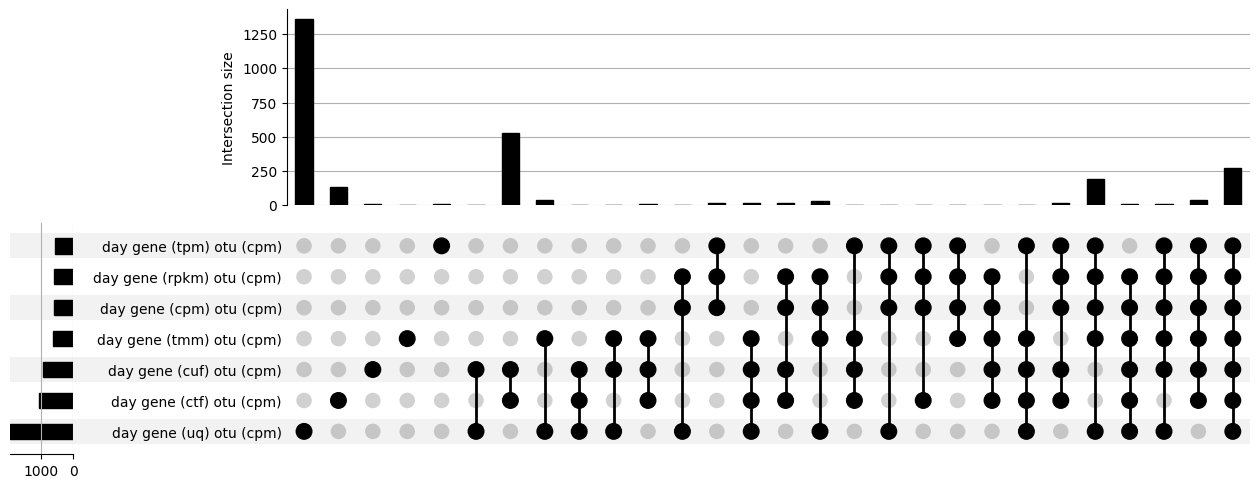

In [185]:
correlations_day = from_contents(
    {"day gene (cpm) otu (cpm)": pairs_day_genecpm_otucpm,
    "day gene (tpm) otu (cpm)": pairs_day_genetpm_otucpm,
    "day gene (tmm) otu (cpm)": pairs_day_genetmm_otucpm,
    "day gene (rpkm) otu (cpm)": pairs_day_generpkm_otucpm,
    "day gene (uq) otu (cpm)": pairs_day_geneuq_otucpm,
    "day gene (ctf) otu (cpm)": pairs_day_genectf_otucpm,
    "day gene (cuf) otu (cpm)": pairs_day_genecuf_otucpm}
)

from upsetplot import UpSet

ax_dict = UpSet(correlations_day, subset_size="count").plot()

/home/rsantos/Repositories/maize_microbiome_transcriptomics/.venv/lib/python3.10/site-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/home/rsantos/Repositories/maize_microbiome_transcriptomics/.venv/lib/python3.10/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform

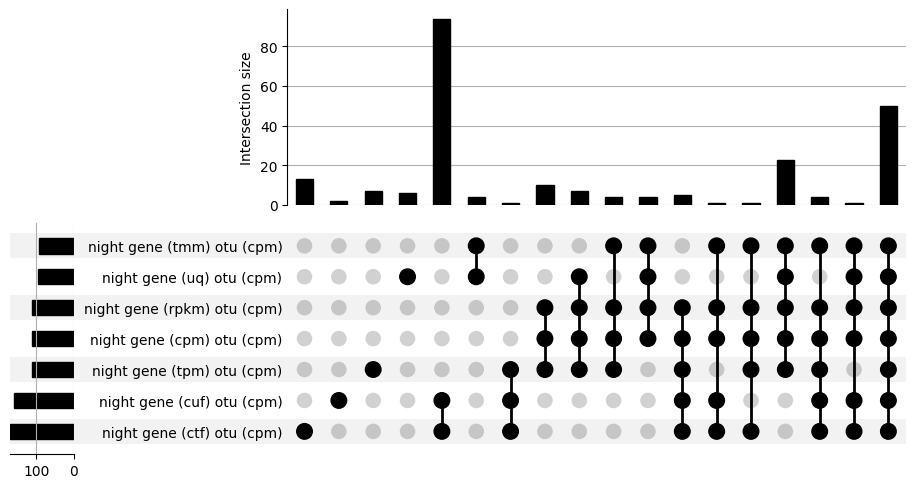

In [187]:
correlations_night = from_contents(
    {"night gene (cpm) otu (cpm)": pairs_night_genecpm_otucpm,
    "night gene (tpm) otu (cpm)": pairs_night_genetpm_otucpm,
    "night gene (tmm) otu (cpm)": pairs_night_genetmm_otucpm,
    "night gene (rpkm) otu (cpm)": pairs_night_generpkm_otucpm,
    "night gene (uq) otu (cpm)": pairs_night_geneuq_otucpm,
    "night gene (ctf) otu (cpm)": pairs_night_genectf_otucpm,
    "night gene (cuf) otu (cpm)": pairs_night_genecuf_otucpm}
)

from upsetplot import UpSet

ax_dict = UpSet(correlations_night, subset_size="count").plot()

## Summarizing results of different normalization methods (not transfomed) versus OTU (CPM)

In [59]:
otucpm_severalgeneexpmethods_night = set(pairs_night_genecpm_otucpm).intersection(set(pairs_night_genetpm_otucpm),
                                             set(pairs_night_genetmm_otucpm),
                                             set(pairs_night_generpkm_otucpm),
                                             set(pairs_night_geneuq_otucpm),
                                             set(pairs_night_genectf_otucpm),
                                             set(pairs_night_genecuf_otucpm))

otucpm_severalgeneexpmethods_day = set(pairs_day_genecpm_otucpm).intersection(set(pairs_day_genetpm_otucpm),
                                             set(pairs_day_genetmm_otucpm),
                                             set(pairs_day_generpkm_otucpm),
                                             set(pairs_day_geneuq_otucpm),
                                             set(pairs_day_genectf_otucpm),
                                             set(pairs_day_genecuf_otucpm))

In [60]:
union_day_night = set(otucpm_severalgeneexpmethods_night).union(otucpm_severalgeneexpmethods_day)
intersection_day_night = set(otucpm_severalgeneexpmethods_night).intersection(otucpm_severalgeneexpmethods_day)

In [61]:
unique_day = set(otucpm_severalgeneexpmethods_night).difference(otucpm_severalgeneexpmethods_day)
unique_night = set(otucpm_severalgeneexpmethods_day).difference(otucpm_severalgeneexpmethods_night)

In [62]:
print(len(union_day_night),
      len(intersection_day_night),
      len(unique_day),
      len(unique_night))

309 11 39 259


In [63]:
intersection_day_night

{('675357', 'Zm00001eb331240_T001'),
 ('New.ReferenceOTU2896', 'Zm00001eb419390_T001'),
 ('New.ReferenceOTU3089', 'Zm00001eb150050_T001'),
 ('New.ReferenceOTU3089', 'Zm00001eb419390_T001'),
 ('New.ReferenceOTU3269', 'Zm00001eb014000_T001'),
 ('New.ReferenceOTU3269', 'Zm00001eb150050_T001'),
 ('New.ReferenceOTU3269', 'Zm00001eb252850_T001'),
 ('New.ReferenceOTU3269', 'Zm00001eb288360_T001'),
 ('New.ReferenceOTU3269', 'Zm00001eb419390_T001'),
 ('New.ReferenceOTU702', 'Zm00001eb419390_T001'),
 ('New.ReferenceOTU7856', 'Zm00001eb419390_T001')}

In [71]:
set([corpair[0] for corpair in intersection_day_night])

{'675357',
 'New.ReferenceOTU2896',
 'New.ReferenceOTU3089',
 'New.ReferenceOTU3269',
 'New.ReferenceOTU702',
 'New.ReferenceOTU7856'}

In [73]:
list(set([corpair[1] for corpair in intersection_day_night]))

['Zm00001eb252850_T001',
 'Zm00001eb288360_T001',
 'Zm00001eb014000_T001',
 'Zm00001eb331240_T001',
 'Zm00001eb150050_T001',
 'Zm00001eb419390_T001']

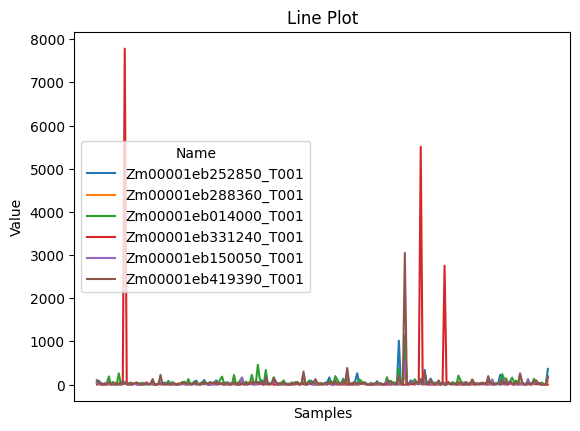

In [96]:
import pandas as pd

import matplotlib.pyplot as plt

# Plot the selected row
kremling_expression_v5_night_tpm.loc[list(set([corpair[1] for corpair in intersection_day_night]))].T.plot(kind='line')

# Set plot title and labels
plt.title('Line Plot')
plt.ylabel('Value')
plt.xlabel('Samples')
plt.xticks([])

# Display the plot
plt.show()

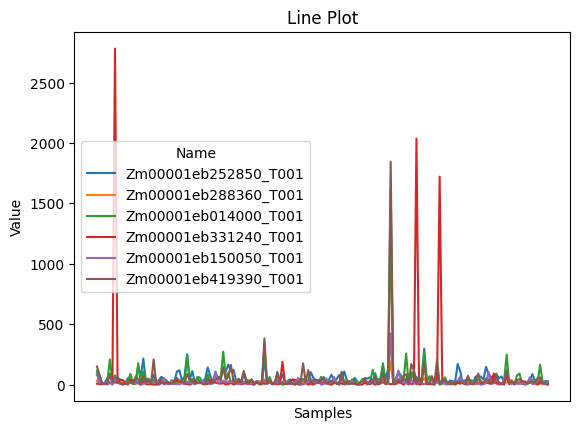

In [99]:
import pandas as pd

import matplotlib.pyplot as plt

# Plot the selected row
kremling_expression_v5_day_tpm.loc[list(set([corpair[1] for corpair in intersection_day_night]))].T.plot(kind='line')

# Set plot title and labels
plt.title('Line Plot')
plt.ylabel('Value')
plt.xlabel('Samples')
plt.xticks([])

# Display the plot
plt.show()

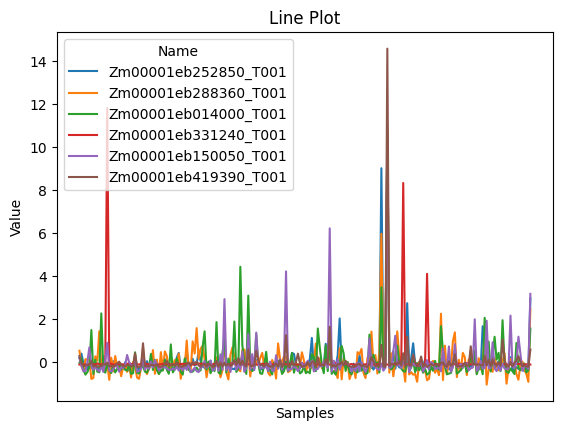

In [95]:
from scipy.stats import zscore
import pandas as pd
import matplotlib.pyplot as plt

#Computing zscores
kremling_expression_v5_night_tpm.loc[list(set([corpair[1] for corpair in intersection_day_night]))].apply(zscore, axis=1).T.plot(kind='line')

# Set plot title and labels
plt.title('Line Plot')
plt.ylabel('Value')
plt.xlabel('Samples')
plt.xticks([])

# Display the plot
plt.show()

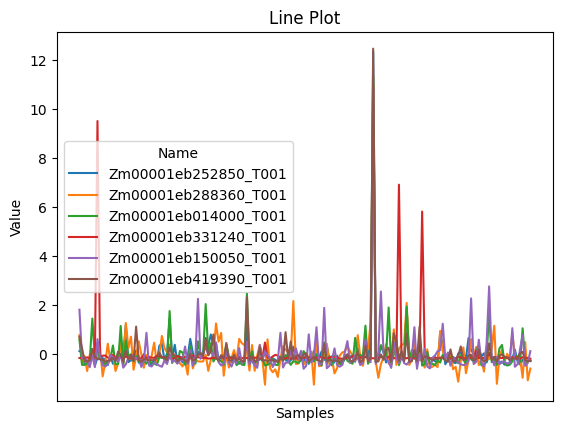

In [100]:
from scipy.stats import zscore
import pandas as pd
import matplotlib.pyplot as plt

#Computing zscores
kremling_expression_v5_day_tpm.loc[list(set([corpair[1] for corpair in intersection_day_night]))].apply(zscore, axis=1).T.plot(kind='line')

# Set plot title and labels
plt.title('Line Plot')
plt.ylabel('Value')
plt.xlabel('Samples')
plt.xticks([])

# Display the plot
plt.show()

### Getting maize annotation and OTU taxonomy

#### Maize annotation

Annotation file was downloaded from Phytozome for the maize v5 genome.

In [104]:
import pandas as pd

zmays_v5_annotation = pd.read_csv("/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/annotation/Phytozome/PhytozomeV13/Zmays/Zm-B73-REFERENCE-NAM-5.0.55/annotation/Zmays_833_Zm-B73-REFERENCE-NAM-5.0.55.annotation_info.txt",
            sep='\t')
zmays_v5_annotation.set_index('transcriptName', inplace=True)
zmays_v5_annotation.head()

,#pacId,locusName,peptideName,Pfam,Panther,ec,KOG,KO,GO,Best-hit-arabi-name,Best-hit-arabi-defline,Best-hit-clamy-name,Best-hit-clamy-defline,Best-hit-rice-name,Best-hit-rice-defline
transcriptName,,,,,,,,,,,,,,,
Zm00001eb000010_T001,PAC:61176664,Zm00001eb000010,Zm00001eb000010_P001,PF02536,PTHR13068 PTHR13068:SF3,NaN,KOG1267,K15032,GO:0003690 GO:0005739 GO:0006355,AT1G78930,Mitochondrial transcription termination factor...,Cre12.g560750,(1 of 8) PTHR13068 - CGI-12 PROTEIN-RELATED,LOC_Os09g38720,"mTERF domain containing protein, expressed"
Zm00001eb000020_T001,PAC:61179637,Zm00001eb000020,Zm00001eb000020_P001,PF01466 PF03931,PTHR11165,NaN,KOG1724,NaN,GO:0006511,NaN,NaN,NaN,NaN,LOC_Os04g52650,expressed protein
Zm00001eb000020_T002,PAC:61179638,Zm00001eb000020,Zm00001eb000020_P002,PF01466 PF03931,PTHR11165,NaN,KOG1724,NaN,GO:0006511,NaN,NaN,NaN,NaN,LOC_Os04g52650,expressed protein
Zm00001eb000020_T003,PAC:61179640,Zm00001eb000020,Zm00001eb000020_P003,PF01466 PF03931,PTHR11165,NaN,KOG1724,NaN,GO:0006511,NaN,NaN,NaN,NaN,LOC_Os04g52650,expressed protein
Zm00001eb000020_T004,PAC:61179639,Zm00001eb000020,Zm00001eb000020_P004,NaN,NaN,EC:1.14.99.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LOC_Os04g52650,expressed protein


In [106]:
zmays_v5_annotation.loc[list(set([corpair[1] for corpair in intersection_day_night]))]

,#pacId,locusName,peptideName,Pfam,Panther,ec,KOG,KO,GO,Best-hit-arabi-name,Best-hit-arabi-defline,Best-hit-clamy-name,Best-hit-clamy-defline,Best-hit-rice-name,Best-hit-rice-defline
transcriptName,,,,,,,,,,,,,,,
Zm00001eb252850_T001,PAC:61201273,Zm00001eb252850,Zm00001eb252850_P001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zm00001eb288360_T001,PAC:61193401,Zm00001eb288360,Zm00001eb288360_P001,PF02365,PTHR31719 PTHR31719:SF3,NaN,NaN,NaN,GO:0003677 GO:0006355,AT1G01720,NAC (No Apical Meristem) domain transcriptiona...,NaN,NaN,LOC_Os05g34830,"No apical meristem protein, putative, expressed"
Zm00001eb014000_T001,PAC:61181256,Zm00001eb014000,Zm00001eb014000_P001,PF00407,PTHR31213 PTHR31213:SF20,NaN,NaN,NaN,GO:0006952 GO:0009607,NaN,NaN,NaN,NaN,LOC_Os03g18850,"pathogenesis-related Bet v I family protein, p..."
Zm00001eb331240_T001,PAC:61149679,Zm00001eb331240,Zm00001eb331240_P001,NaN,NaN,NaN,NaN,NaN,GO:0004519 GO:0006298,NaN,NaN,NaN,NaN,LOC_Os03g59874,conserved hypothetical protein
Zm00001eb150050_T001,PAC:61206485,Zm00001eb150050,Zm00001eb150050_P001,PF00314,PTHR31048 PTHR31048:SF14,NaN,NaN,NaN,NaN,NaN,NaN,Cre02.g102300,(1 of 1) PTHR31013:SF2 - PROTEIN THN-1-RELATED,LOC_Os12g43490,"thaumatin, putative, expressed"
Zm00001eb419390_T001,PAC:61185703,Zm00001eb419390,Zm00001eb419390_P001,NaN,PTHR33479,NaN,NaN,NaN,GO:0004867 GO:0005576,NaN,NaN,NaN,NaN,NaN,NaN


#### OTU taxonomy

Taxonomy assigment was carried out using qiime2 and GTDB version 214.

For some reason, the assignment is possible only until the genus level (likely due to a bug, because the file apparently shows species level but breaking the field after the whitespace)

In [113]:
import pandas as pd

otu_assignment_gtdb2014 = pd.read_csv("/media/rsantos/4TB_drive/Projects/UGA_RACS/16S/Wallace_et_al_2018_2/Classification_GTDB/gtdb-214_rep_set_taxonomy/taxonomy.tsv",
                                      sep='\t')
otu_assignment_gtdb2014.set_index('Feature ID', inplace=True)
otu_assignment_gtdb2014.head()

,Taxon,Confidence
Feature ID,,
10001,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,0.999554
1000148,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,0.999977
1000161,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,0.852679
1000188,d__Bacteria;p__Bacillota;c__Bacilli;o__Lactoba...,0.996888
1000269,d__Bacteria;p__Bacillota;c__Bacilli;o__Lactoba...,0.996307


In [124]:
pd.set_option('max_colwidth', 1000)
otu_assignment_gtdb2014.loc[list(set([corpair[0] for corpair in intersection_day_night]))]['Taxon']

Feature ID
New.ReferenceOTU3089                                                                                                      d__Bacteria;p__Pseudomonadota
New.ReferenceOTU3269    d__Bacteria;p__Pseudomonadota;c__Alphaproteobacteria;o__Rhizobiales;f__Beijerinckiaceae;g__Methylobacterium;s__Methylobacterium
New.ReferenceOTU2896                                                                               d__Bacteria;p__Pseudomonadota;c__Gammaproteobacteria
New.ReferenceOTU7856    d__Bacteria;p__Pseudomonadota;c__Alphaproteobacteria;o__Rhizobiales;f__Beijerinckiaceae;g__Methylobacterium;s__Methylobacterium
675357                                  d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Cytophagales;f__Hymenobacteraceae;g__Hymenobacter;s__Hymenobacter
New.ReferenceOTU702     d__Bacteria;p__Pseudomonadota;c__Alphaproteobacteria;o__Rhizobiales;f__Beijerinckiaceae;g__Methylobacterium;s__Methylobacterium
Name: Taxon, dtype: object

In [123]:
# This is apparently the default width; return to it
pd.set_option('max_colwidth', 50)

## Correlations - gene (asinh) versus OTU (CPM - asinh)

Initial tests with gene expression transformed using the asinh function did not return anything if correlations were made with untransformed OTU values (CPM without asinh). Therefore, I tested correlations after transforming all data equally (OTUs and Gene expressions were transformed)

In [7]:
from corals.threads import set_threads_for_external_libraries
set_threads_for_external_libraries(n_threads=1)
import numpy as np
from corals.correlation.full.default import cor_full

/home/rsantos/Repositories/maize_microbiome_transcriptomics/.venv/lib/python3.10/site-packages/corals/threads.py:48: UserWarning: This function should be called before `numpy` or similar modules are imported.
  warnings.warn("This function should be called before `numpy` or similar modules are imported.")


### OTU (CPM) - Gene (CPM) - ASINH

In [8]:
concat_df_night = pd.concat([kremling_expression_v5_night_cpm_asinh, otu_table_merged_night_cpm_asinh], axis=0)
concat_df_day = pd.concat([kremling_expression_v5_day_cpm_asinh, otu_table_merged_day_cpm_asinh], axis=0)

concatenated_transposed_day = concat_df_day.transpose()
concatenated_transposed_night = concat_df_night.transpose()

cor_values_day = cor_full(concatenated_transposed_day)
cor_values_night = cor_full(concatenated_transposed_night)

true_positions_day = np.where(cor_values_day > 0.5)
shape_row_day = kremling_expression_v5_day_cpm_asinh.shape[0]
true_positions_night = np.where(cor_values_night > 0.5)
shape_row_night = kremling_expression_v5_night_cpm_asinh.shape[0]

pairs_day_genecpmasinh_otucpm = []
pairs_night_genecpmasinh_otucpm = []

for i in range(len(true_positions_day[0])):
    if (true_positions_day[1][i] > (shape_row_day - 1)) and (true_positions_day[0][i] < shape_row_day):
        pairs_day_genecpmasinh_otucpm.append((str(cor_values_day.columns[true_positions_day[1][i]]),
              str(cor_values_day.index[true_positions_day[0][i]])))

for i in range(len(true_positions_night[0])):
    if (true_positions_night[1][i] > (shape_row_night - 1)) and (true_positions_night[0][i] < shape_row_night):
        pairs_night_genecpmasinh_otucpm.append((str(cor_values_night.columns[true_positions_night[1][i]]),
              str(cor_values_night.index[true_positions_night[0][i]])))

In [11]:
print(len(pairs_day_genecpmasinh_otucpm))
print(len(pairs_night_genecpmasinh_otucpm))

78
0


### OTU (CPM) - Gene (TPM) - ASINH

In [12]:
concat_df_night = pd.concat([kremling_expression_v5_night_tpm_asinh, otu_table_merged_night_cpm_asinh], axis=0)
concat_df_day = pd.concat([kremling_expression_v5_day_tpm_asinh, otu_table_merged_day_cpm_asinh], axis=0)

concatenated_transposed_day = concat_df_day.transpose()
concatenated_transposed_night = concat_df_night.transpose()

cor_values_day = cor_full(concatenated_transposed_day)
cor_values_night = cor_full(concatenated_transposed_night)

true_positions_day = np.where(cor_values_day > 0.5)
shape_row_day = kremling_expression_v5_day_tpm_asinh.shape[0]
true_positions_night = np.where(cor_values_night > 0.5)
shape_row_night = kremling_expression_v5_night_tpm_asinh.shape[0]

pairs_day_genetpmasinh_otucpm = []
pairs_night_genetpmasinh_otucpm = []

for i in range(len(true_positions_day[0])):
    if (true_positions_day[1][i] > (shape_row_day - 1)) and (true_positions_day[0][i] < shape_row_day):
        pairs_day_genetpmasinh_otucpm.append((str(cor_values_day.columns[true_positions_day[1][i]]),
              str(cor_values_day.index[true_positions_day[0][i]])))

for i in range(len(true_positions_night[0])):
    if (true_positions_night[1][i] > (shape_row_night - 1)) and (true_positions_night[0][i] < shape_row_night):
        pairs_night_genetpmasinh_otucpm.append((str(cor_values_night.columns[true_positions_night[1][i]]),
              str(cor_values_night.index[true_positions_night[0][i]])))

In [13]:
print(len(pairs_day_genetpmasinh_otucpm))
print(len(pairs_night_genetpmasinh_otucpm))

0
390


### OTU (CPM) - Gene (RPKM) - ASINH

In [14]:
concat_df_night = pd.concat([kremling_expression_v5_night_rpkm_asinh, otu_table_merged_night_cpm_asinh], axis=0)
concat_df_day = pd.concat([kremling_expression_v5_day_rpkm_asinh, otu_table_merged_day_cpm_asinh], axis=0)

concatenated_transposed_day = concat_df_day.transpose()
concatenated_transposed_night = concat_df_night.transpose()

cor_values_day = cor_full(concatenated_transposed_day)
cor_values_night = cor_full(concatenated_transposed_night)

true_positions_day = np.where(cor_values_day > 0.5)
shape_row_day = kremling_expression_v5_day_rpkm_asinh.shape[0]
true_positions_night = np.where(cor_values_night > 0.5)
shape_row_night = kremling_expression_v5_night_rpkm_asinh.shape[0]

pairs_day_generpkmasinh_otucpm = []
pairs_night_generpkmasinh_otucpm = []

for i in range(len(true_positions_day[0])):
    if (true_positions_day[1][i] > (shape_row_day - 1)) and (true_positions_day[0][i] < shape_row_day):
        pairs_day_generpkmasinh_otucpm.append((str(cor_values_day.columns[true_positions_day[1][i]]),
              str(cor_values_day.index[true_positions_day[0][i]])))

for i in range(len(true_positions_night[0])):
    if (true_positions_night[1][i] > (shape_row_night - 1)) and (true_positions_night[0][i] < shape_row_night):
        pairs_night_generpkmasinh_otucpm.append((str(cor_values_night.columns[true_positions_night[1][i]]),
              str(cor_values_night.index[true_positions_night[0][i]])))

In [15]:
print(len(pairs_day_generpkmasinh_otucpm))
print(len(pairs_night_generpkmasinh_otucpm))

83
455


### OTU (CPM) - Gene (TMM) - ASINH

In [16]:
concat_df_night = pd.concat([kremling_expression_v5_night_tmm_asinh, otu_table_merged_night_cpm_asinh], axis=0)
concat_df_day = pd.concat([kremling_expression_v5_day_tmm_asinh, otu_table_merged_day_cpm_asinh], axis=0)

concatenated_transposed_day = concat_df_day.transpose()
concatenated_transposed_night = concat_df_night.transpose()

cor_values_day = cor_full(concatenated_transposed_day)
cor_values_night = cor_full(concatenated_transposed_night)

true_positions_day = np.where(cor_values_day > 0.5)
shape_row_day = kremling_expression_v5_day_tmm_asinh.shape[0]
true_positions_night = np.where(cor_values_night > 0.5)
shape_row_night = kremling_expression_v5_night_tmm_asinh.shape[0]

pairs_day_genetmmasinh_otucpm = []
pairs_night_genetmmasinh_otucpm = []

for i in range(len(true_positions_day[0])):
    if (true_positions_day[1][i] > (shape_row_day - 1)) and (true_positions_day[0][i] < shape_row_day):
        pairs_day_genetmmasinh_otucpm.append((str(cor_values_day.columns[true_positions_day[1][i]]),
              str(cor_values_day.index[true_positions_day[0][i]])))

for i in range(len(true_positions_night[0])):
    if (true_positions_night[1][i] > (shape_row_night - 1)) and (true_positions_night[0][i] < shape_row_night):
        pairs_night_genetmmasinh_otucpm.append((str(cor_values_night.columns[true_positions_night[1][i]]),
              str(cor_values_night.index[true_positions_night[0][i]])))

In [17]:
print(len(pairs_day_genetmmasinh_otucpm))
print(len(pairs_night_genetmmasinh_otucpm))

101
447


### OTU (CPM) - Gene (UQ) - ASINH

In [18]:
concat_df_night = pd.concat([kremling_expression_v5_night_uq_asinh, otu_table_merged_night_cpm_asinh], axis=0)
concat_df_day = pd.concat([kremling_expression_v5_day_uq_asinh, otu_table_merged_day_cpm_asinh], axis=0)

concatenated_transposed_day = concat_df_day.transpose()
concatenated_transposed_night = concat_df_night.transpose()

cor_values_day = cor_full(concatenated_transposed_day)
cor_values_night = cor_full(concatenated_transposed_night)

true_positions_day = np.where(cor_values_day > 0.5)
shape_row_day = kremling_expression_v5_day_uq_asinh.shape[0]
true_positions_night = np.where(cor_values_night > 0.5)
shape_row_night = kremling_expression_v5_night_uq_asinh.shape[0]

pairs_day_geneuqasinh_otucpm = []
pairs_night_geneuqasinh_otucpm = []

for i in range(len(true_positions_day[0])):
    if (true_positions_day[1][i] > (shape_row_day - 1)) and (true_positions_day[0][i] < shape_row_day):
        pairs_day_geneuqasinh_otucpm.append((str(cor_values_day.columns[true_positions_day[1][i]]),
              str(cor_values_day.index[true_positions_day[0][i]])))

for i in range(len(true_positions_night[0])):
    if (true_positions_night[1][i] > (shape_row_night - 1)) and (true_positions_night[0][i] < shape_row_night):
        pairs_night_geneuqasinh_otucpm.append((str(cor_values_night.columns[true_positions_night[1][i]]),
              str(cor_values_night.index[true_positions_night[0][i]])))

In [19]:
print(len(pairs_day_geneuqasinh_otucpm))
print(len(pairs_night_geneuqasinh_otucpm))

106
0


### OTU (CPM) - Gene (CTF) - ASINH

In [20]:
concat_df_night = pd.concat([kremling_expression_v5_night_ctf_asinh, otu_table_merged_night_cpm_asinh], axis=0)
concat_df_day = pd.concat([kremling_expression_v5_day_ctf_asinh, otu_table_merged_day_cpm_asinh], axis=0)

concatenated_transposed_day = concat_df_day.transpose()
concatenated_transposed_night = concat_df_night.transpose()

cor_values_day = cor_full(concatenated_transposed_day)
cor_values_night = cor_full(concatenated_transposed_night)

true_positions_day = np.where(cor_values_day > 0.5)
shape_row_day = kremling_expression_v5_day_ctf_asinh.shape[0]
true_positions_night = np.where(cor_values_night > 0.5)
shape_row_night = kremling_expression_v5_night_ctf_asinh.shape[0]

pairs_day_genectfasinh_otucpm = []
pairs_night_genectfasinh_otucpm = []

for i in range(len(true_positions_day[0])):
    if (true_positions_day[1][i] > (shape_row_day - 1)) and (true_positions_day[0][i] < shape_row_day):
        pairs_day_genectfasinh_otucpm.append((str(cor_values_day.columns[true_positions_day[1][i]]),
              str(cor_values_day.index[true_positions_day[0][i]])))

for i in range(len(true_positions_night[0])):
    if (true_positions_night[1][i] > (shape_row_night - 1)) and (true_positions_night[0][i] < shape_row_night):
        pairs_night_genectfasinh_otucpm.append((str(cor_values_night.columns[true_positions_night[1][i]]),
              str(cor_values_night.index[true_positions_night[0][i]])))

In [21]:
print(len(pairs_day_genectfasinh_otucpm))
print(len(pairs_night_genectfasinh_otucpm))

27
128


### OTU (CPM) - Gene (CUF) - ASINH

In [22]:
concat_df_night = pd.concat([kremling_expression_v5_night_cuf_asinh, otu_table_merged_night_cpm_asinh], axis=0)
concat_df_day = pd.concat([kremling_expression_v5_day_cuf_asinh, otu_table_merged_day_cpm_asinh], axis=0)

concatenated_transposed_day = concat_df_day.transpose()
concatenated_transposed_night = concat_df_night.transpose()

cor_values_day = cor_full(concatenated_transposed_day)
cor_values_night = cor_full(concatenated_transposed_night)

true_positions_day = np.where(cor_values_day > 0.5)
shape_row_day = kremling_expression_v5_day_cuf_asinh.shape[0]
true_positions_night = np.where(cor_values_night > 0.5)
shape_row_night = kremling_expression_v5_night_cuf_asinh.shape[0]

pairs_day_genecufasinh_otucpm = []
pairs_night_genecufasinh_otucpm = []

for i in range(len(true_positions_day[0])):
    if (true_positions_day[1][i] > (shape_row_day - 1)) and (true_positions_day[0][i] < shape_row_day):
        pairs_day_genecufasinh_otucpm.append((str(cor_values_day.columns[true_positions_day[1][i]]),
              str(cor_values_day.index[true_positions_day[0][i]])))

for i in range(len(true_positions_night[0])):
    if (true_positions_night[1][i] > (shape_row_night - 1)) and (true_positions_night[0][i] < shape_row_night):
        pairs_night_genecufasinh_otucpm.append((str(cor_values_night.columns[true_positions_night[1][i]]),
              str(cor_values_night.index[true_positions_night[0][i]])))

In [23]:
print(len(pairs_day_genecufasinh_otucpm))
print(len(pairs_night_genecufasinh_otucpm))

29
148


In [53]:
import upsetplot

from upsetplot import from_contents

/home/rsantos/Repositories/maize_microbiome_transcriptomics/.venv/lib/python3.10/site-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/home/rsantos/Repositories/maize_microbiome_transcriptomics/.venv/lib/python3.10/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform

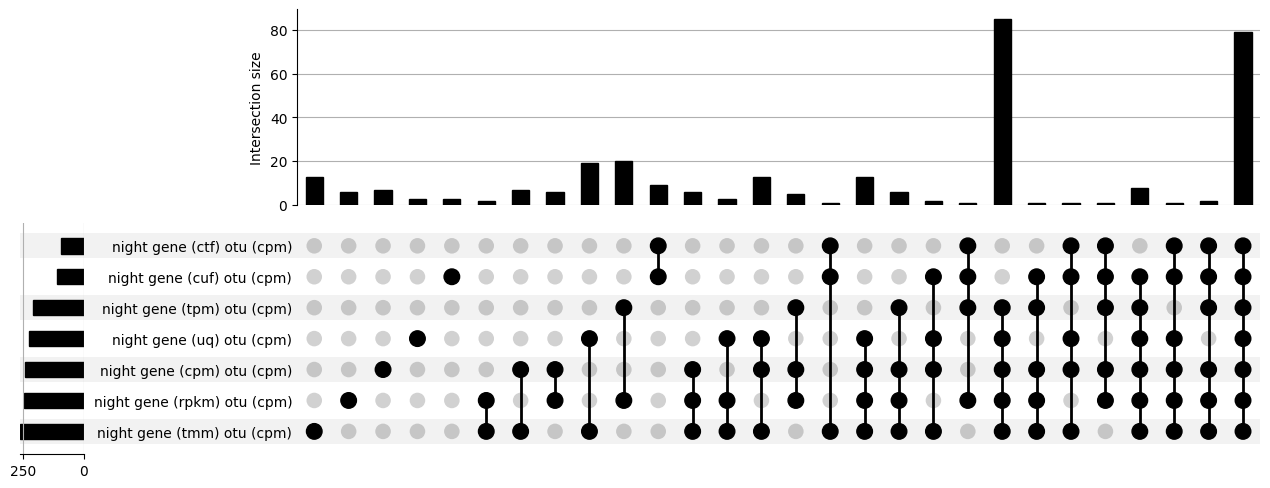

In [195]:
correlations_asinh_night = from_contents(
    {"night gene (cpm) otu (cpm)": pairs_night_genecpmasinh_otucpm,
    "night gene (tpm) otu (cpm)": pairs_night_genetpmasinh_otucpm,
    "night gene (tmm) otu (cpm)": pairs_night_genetmmasinh_otucpm,
    "night gene (rpkm) otu (cpm)": pairs_night_generpkmasinh_otucpm,
    "night gene (uq) otu (cpm)": pairs_night_geneuqasinh_otucpm,
    "night gene (ctf) otu (cpm)": pairs_night_genectfasinh_otucpm,
    "night gene (cuf) otu (cpm)": pairs_night_genecufasinh_otucpm}
)

from upsetplot import UpSet

ax_dict = UpSet(correlations_asinh_night, subset_size="count").plot()

/home/rsantos/Repositories/maize_microbiome_transcriptomics/.venv/lib/python3.10/site-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/home/rsantos/Repositories/maize_microbiome_transcriptomics/.venv/lib/python3.10/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform

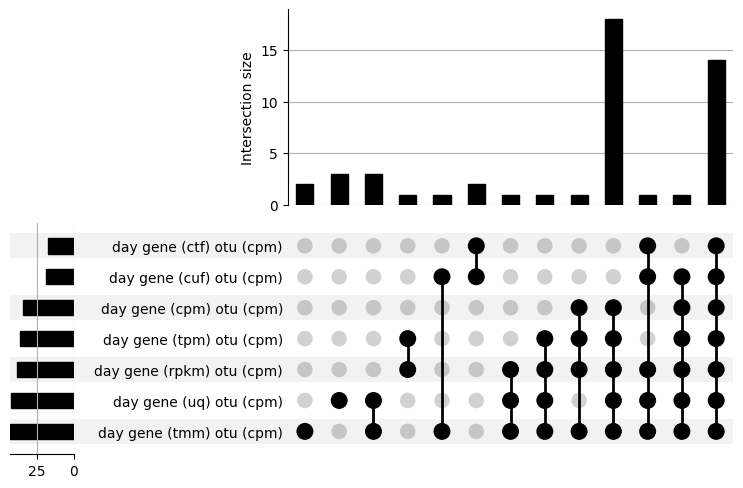

In [196]:
correlations_asinh_day = from_contents(
    {"day gene (cpm) otu (cpm)": pairs_day_genecpmasinh_otucpm,
    "day gene (tpm) otu (cpm)": pairs_day_genetpmasinh_otucpm,
    "day gene (tmm) otu (cpm)": pairs_day_genetmmasinh_otucpm,
    "day gene (rpkm) otu (cpm)": pairs_day_generpkmasinh_otucpm,
    "day gene (uq) otu (cpm)": pairs_day_geneuqasinh_otucpm,
    "day gene (ctf) otu (cpm)": pairs_day_genectfasinh_otucpm,
    "day gene (cuf) otu (cpm)": pairs_day_genecufasinh_otucpm}
)

from upsetplot import UpSet

ax_dict = UpSet(correlations_asinh_day, subset_size="count").plot()

/home/rsantos/Repositories/maize_microbiome_transcriptomics/.venv/lib/python3.10/site-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/home/rsantos/Repositories/maize_microbiome_transcriptomics/.venv/lib/python3.10/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform

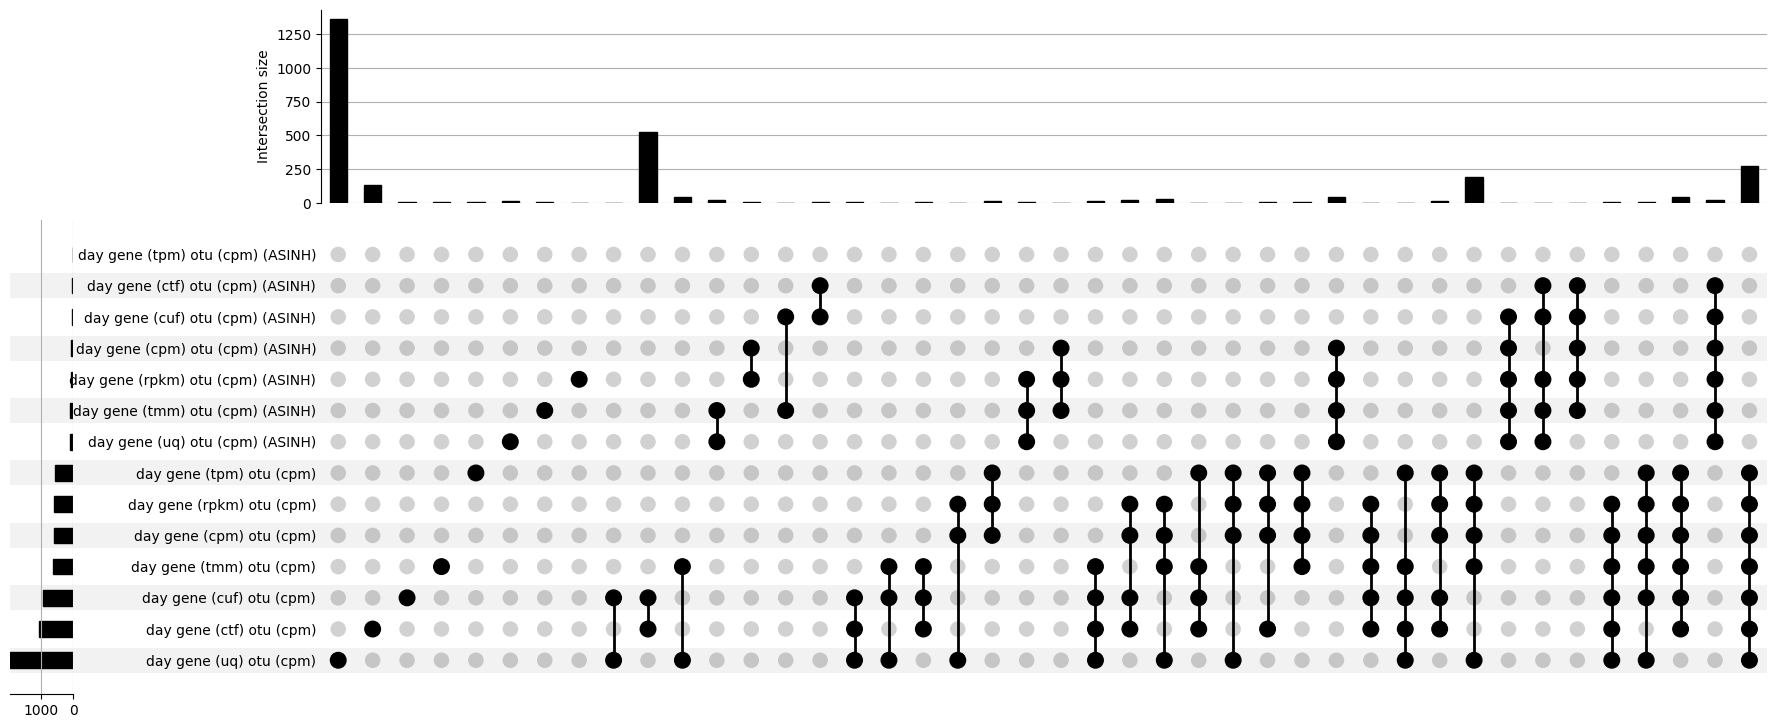

In [54]:
correlations_asinh_notasinh_day = from_contents(
    {"day gene (cpm) otu (cpm) (ASINH)": pairs_day_genecpmasinh_otucpm,
    "day gene (tpm) otu (cpm) (ASINH)": pairs_day_genetpmasinh_otucpm,
    "day gene (tmm) otu (cpm) (ASINH)": pairs_day_genetmmasinh_otucpm,
    "day gene (rpkm) otu (cpm) (ASINH)": pairs_day_generpkmasinh_otucpm,
    "day gene (uq) otu (cpm) (ASINH)": pairs_day_geneuqasinh_otucpm,
    "day gene (ctf) otu (cpm) (ASINH)": pairs_day_genectfasinh_otucpm,
    "day gene (cuf) otu (cpm) (ASINH)": pairs_day_genecufasinh_otucpm,
    "day gene (cpm) otu (cpm)": pairs_day_genecpm_otucpm,
    "day gene (tpm) otu (cpm)": pairs_day_genetpm_otucpm,
    "day gene (tmm) otu (cpm)": pairs_day_genetmm_otucpm,
    "day gene (rpkm) otu (cpm)": pairs_day_generpkm_otucpm,
    "day gene (uq) otu (cpm)": pairs_day_geneuq_otucpm,
    "day gene (ctf) otu (cpm)": pairs_day_genectf_otucpm,
    "day gene (cuf) otu (cpm)": pairs_day_genecuf_otucpm}
)

from upsetplot import UpSet

ax_dict = UpSet(correlations_asinh_notasinh_day, subset_size="count").plot()

/home/rsantos/Repositories/maize_microbiome_transcriptomics/.venv/lib/python3.10/site-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/home/rsantos/Repositories/maize_microbiome_transcriptomics/.venv/lib/python3.10/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform

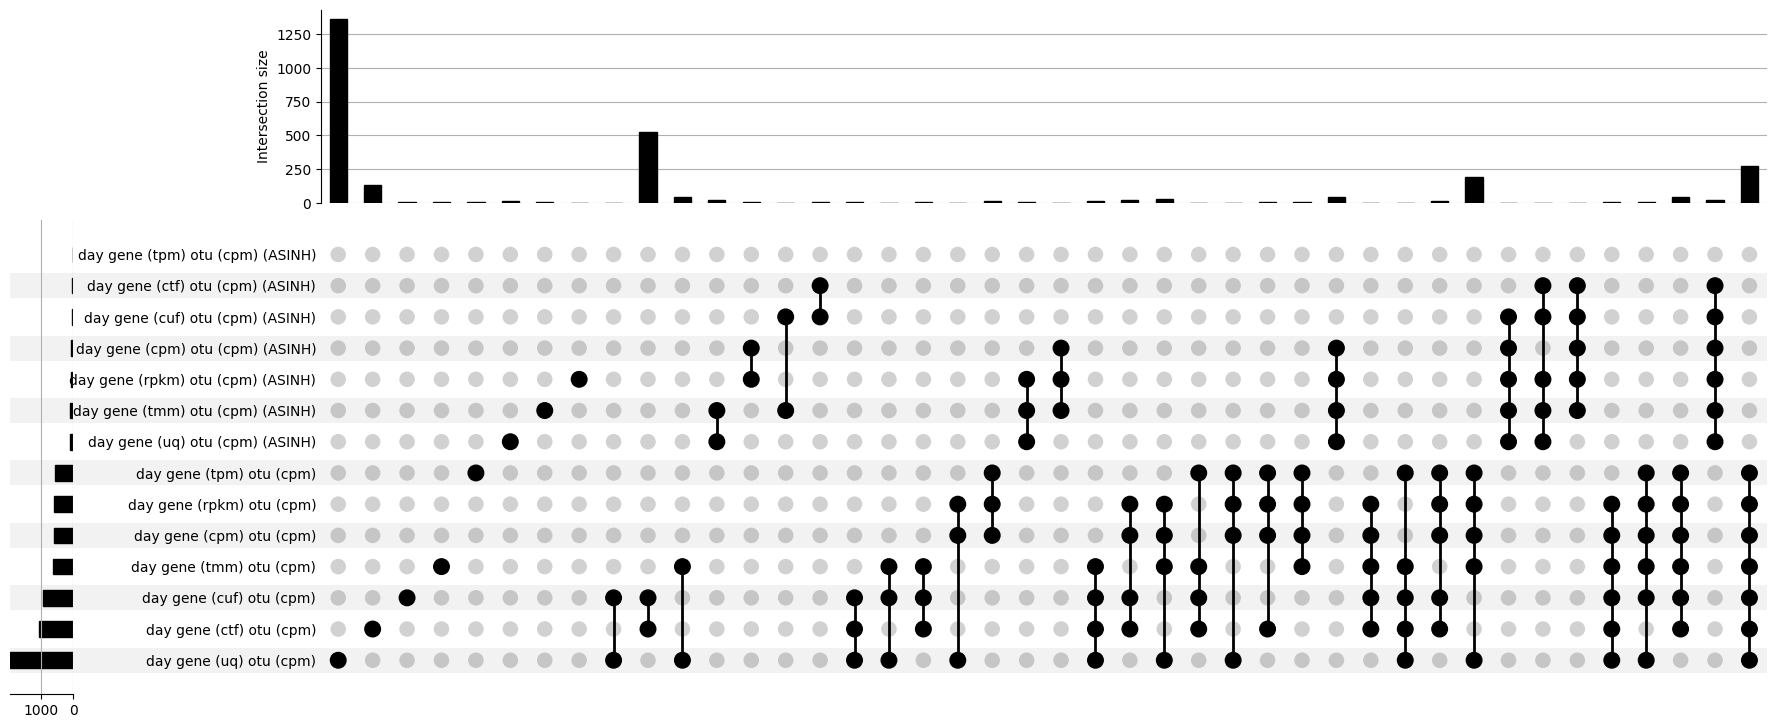

In [56]:
correlations_asinh_notasinh_night = from_contents(
    {"day gene (cpm) otu (cpm) (ASINH)": pairs_night_genecpmasinh_otucpm,
    "day gene (tpm) otu (cpm) (ASINH)": pairs_night_genetpmasinh_otucpm,
    "day gene (tmm) otu (cpm) (ASINH)": pairs_night_genetmmasinh_otucpm,
    "day gene (rpkm) otu (cpm) (ASINH)": pairs_night_generpkmasinh_otucpm,
    "day gene (uq) otu (cpm) (ASINH)": pairs_night_geneuqasinh_otucpm,
    "day gene (ctf) otu (cpm) (ASINH)": pairs_night_genectfasinh_otucpm,
    "day gene (cuf) otu (cpm) (ASINH)": pairs_night_genecufasinh_otucpm,
    "day gene (cpm) otu (cpm)": pairs_night_genecpm_otucpm,
    "day gene (tpm) otu (cpm)": pairs_night_genetpm_otucpm,
    "day gene (tmm) otu (cpm)": pairs_night_genetmm_otucpm,
    "day gene (rpkm) otu (cpm)": pairs_night_generpkm_otucpm,
    "day gene (uq) otu (cpm)": pairs_night_geneuq_otucpm,
    "day gene (ctf) otu (cpm)": pairs_night_genectf_otucpm,
    "day gene (cuf) otu (cpm)": pairs_night_genecuf_otucpm}
)

from upsetplot import UpSet

ax_dict = UpSet(correlations_asinh_notasinh_day, subset_size="count").plot()

## Correlations - gene (VST) versus OTU (CPM - VST)

Testing correlations after transforming all data equally (OTUs and Gene expressions were transformed using DESeq2 VST function).

## Correlations - gene (no asinh) versus OTU (relative abundance)

Testing correlations of OTUs (relative abundances after filtering) and Gene expressions (all normalizations, after filtering).

In [41]:
from corals.threads import set_threads_for_external_libraries
set_threads_for_external_libraries(n_threads=1)
import numpy as np
from corals.correlation.full.default import cor_full

/home/rsantos/Repositories/maize_microbiome_transcriptomics/.venv/lib/python3.10/site-packages/corals/threads.py:48: UserWarning: This function should be called before `numpy` or similar modules are imported.
  warnings.warn("This function should be called before `numpy` or similar modules are imported.")


### OTU (relative abundances) - Gene (CPM)

In [42]:
concat_df_night = pd.concat([kremling_expression_v5_night_cpm_filtered_cv_filtered, otu_table_merged_night_relative_abund_filtered_cv_filtered], axis=0)
concat_df_day = pd.concat([kremling_expression_v5_day_cpm_filtered_cv_filtered, otu_table_merged_day_relative_abund_filtered_cv_filtered], axis=0)

concatenated_transposed_day = concat_df_day.transpose()
concatenated_transposed_night = concat_df_night.transpose()

cor_values_day = cor_full(concatenated_transposed_day)
cor_values_night = cor_full(concatenated_transposed_night)

true_positions_day = np.where(cor_values_day > 0.6)
shape_row_day = kremling_expression_v5_day_cpm_filtered_cv_filtered.shape[0]
true_positions_night = np.where(cor_values_night > 0.6)
shape_row_night = kremling_expression_v5_night_cpm_filtered_cv_filtered.shape[0]

pairs_day_genecpm_oturelabund = []
pairs_night_genecpm_oturelabund = []

for i in range(len(true_positions_day[0])):
    if (true_positions_day[1][i] > (shape_row_day - 1)) and (true_positions_day[0][i] < shape_row_day):
        pairs_day_genecpm_oturelabund.append((str(cor_values_day.columns[true_positions_day[1][i]]),
              str(cor_values_day.index[true_positions_day[0][i]])))

for i in range(len(true_positions_night[0])):
    if (true_positions_night[1][i] > (shape_row_night - 1)) and (true_positions_night[0][i] < shape_row_night):
        pairs_night_genecpm_oturelabund.append((str(cor_values_night.columns[true_positions_night[1][i]]),
              str(cor_values_night.index[true_positions_night[0][i]])))

In [43]:
print(len(pairs_day_genecpm_oturelabund))
print(len(pairs_night_genecpm_oturelabund))

599
110


### OTU (relative abundances) - Gene (RPKM)

In [45]:
concat_df_night = pd.concat([kremling_expression_v5_night_rpkm_filtered_cv_filtered, otu_table_merged_night_relative_abund_filtered_cv_filtered], axis=0)
concat_df_day = pd.concat([kremling_expression_v5_day_rpkm_filtered_cv_filtered, otu_table_merged_day_relative_abund_filtered_cv_filtered], axis=0)

concatenated_transposed_day = concat_df_day.transpose()
concatenated_transposed_night = concat_df_night.transpose()

cor_values_day = cor_full(concatenated_transposed_day)
cor_values_night = cor_full(concatenated_transposed_night)

true_positions_day = np.where(cor_values_day > 0.6)
shape_row_day = kremling_expression_v5_day_rpkm_filtered_cv_filtered.shape[0]
true_positions_night = np.where(cor_values_night > 0.6)
shape_row_night = kremling_expression_v5_night_rpkm_filtered_cv_filtered.shape[0]

pairs_day_generpkm_oturelabund = []
pairs_night_generpkm_oturelabund = []

for i in range(len(true_positions_day[0])):
    if (true_positions_day[1][i] > (shape_row_day - 1)) and (true_positions_day[0][i] < shape_row_day):
        pairs_day_generpkm_oturelabund.append((str(cor_values_day.columns[true_positions_day[1][i]]),
              str(cor_values_day.index[true_positions_day[0][i]])))

for i in range(len(true_positions_night[0])):
    if (true_positions_night[1][i] > (shape_row_night - 1)) and (true_positions_night[0][i] < shape_row_night):
        pairs_night_generpkm_oturelabund.append((str(cor_values_night.columns[true_positions_night[1][i]]),
              str(cor_values_night.index[true_positions_night[0][i]])))

In [46]:
print(len(pairs_day_generpkm_oturelabund))
print(len(pairs_night_generpkm_oturelabund))

599
110


### OTU (relative abundances) - Gene (TPM)

In [49]:
concat_df_night = pd.concat([kremling_expression_v5_night_tpm_filtered_cv_filtered, otu_table_merged_night_relative_abund_filtered_cv_filtered], axis=0)
concat_df_day = pd.concat([kremling_expression_v5_day_tpm_filtered_cv_filtered, otu_table_merged_day_relative_abund_filtered_cv_filtered], axis=0)

concatenated_transposed_day = concat_df_day.transpose()
concatenated_transposed_night = concat_df_night.transpose()

cor_values_day = cor_full(concatenated_transposed_day)
cor_values_night = cor_full(concatenated_transposed_night)

true_positions_day = np.where(cor_values_day > 0.6)
shape_row_day = kremling_expression_v5_day_tpm_filtered_cv_filtered.shape[0]
true_positions_night = np.where(cor_values_night > 0.6)
shape_row_night = kremling_expression_v5_night_tpm_filtered_cv_filtered.shape[0]

pairs_day_genetpm_oturelabund = []
pairs_night_genetpm_oturelabund = []

for i in range(len(true_positions_day[0])):
    if (true_positions_day[1][i] > (shape_row_day - 1)) and (true_positions_day[0][i] < shape_row_day):
        pairs_day_genetpm_oturelabund.append((str(cor_values_day.columns[true_positions_day[1][i]]),
              str(cor_values_day.index[true_positions_day[0][i]])))

for i in range(len(true_positions_night[0])):
    if (true_positions_night[1][i] > (shape_row_night - 1)) and (true_positions_night[0][i] < shape_row_night):
        pairs_night_genetpm_oturelabund.append((str(cor_values_night.columns[true_positions_night[1][i]]),
              str(cor_values_night.index[true_positions_night[0][i]])))

In [50]:
print(len(pairs_day_genetpm_oturelabund))
print(len(pairs_night_genetpm_oturelabund))

552
112


### OTU (relative abundances) - Gene (TMM)

In [51]:
concat_df_night = pd.concat([kremling_expression_v5_night_tmm_filtered_cv_filtered, otu_table_merged_night_relative_abund_filtered_cv_filtered], axis=0)
concat_df_day = pd.concat([kremling_expression_v5_day_tmm_filtered_cv_filtered, otu_table_merged_day_relative_abund_filtered_cv_filtered], axis=0)

concatenated_transposed_day = concat_df_day.transpose()
concatenated_transposed_night = concat_df_night.transpose()

cor_values_day = cor_full(concatenated_transposed_day)
cor_values_night = cor_full(concatenated_transposed_night)

true_positions_day = np.where(cor_values_day > 0.6)
shape_row_day = kremling_expression_v5_day_tmm_filtered_cv_filtered.shape[0]
true_positions_night = np.where(cor_values_night > 0.6)
shape_row_night = kremling_expression_v5_night_tmm_filtered_cv_filtered.shape[0]

pairs_day_genetmm_oturelabund = []
pairs_night_genetmm_oturelabund = []

for i in range(len(true_positions_day[0])):
    if (true_positions_day[1][i] > (shape_row_day - 1)) and (true_positions_day[0][i] < shape_row_day):
        pairs_day_genetmm_oturelabund.append((str(cor_values_day.columns[true_positions_day[1][i]]),
              str(cor_values_day.index[true_positions_day[0][i]])))

for i in range(len(true_positions_night[0])):
    if (true_positions_night[1][i] > (shape_row_night - 1)) and (true_positions_night[0][i] < shape_row_night):
        pairs_night_genetmm_oturelabund.append((str(cor_values_night.columns[true_positions_night[1][i]]),
              str(cor_values_night.index[true_positions_night[0][i]])))

In [52]:
print(len(pairs_day_genetmm_oturelabund))
print(len(pairs_night_genetmm_oturelabund))

620
92


### OTU (relative abundances) - Gene (UQ)

In [53]:
concat_df_night = pd.concat([kremling_expression_v5_night_uq_filtered_cv_filtered, otu_table_merged_night_relative_abund_filtered_cv_filtered], axis=0)
concat_df_day = pd.concat([kremling_expression_v5_day_uq_filtered_cv_filtered, otu_table_merged_day_relative_abund_filtered_cv_filtered], axis=0)

concatenated_transposed_day = concat_df_day.transpose()
concatenated_transposed_night = concat_df_night.transpose()

cor_values_day = cor_full(concatenated_transposed_day)
cor_values_night = cor_full(concatenated_transposed_night)

true_positions_day = np.where(cor_values_day > 0.6)
shape_row_day = kremling_expression_v5_day_uq_filtered_cv_filtered.shape[0]
true_positions_night = np.where(cor_values_night > 0.6)
shape_row_night = kremling_expression_v5_night_uq_filtered_cv_filtered.shape[0]

pairs_day_geneuq_oturelabund = []
pairs_night_geneuq_oturelabund = []

for i in range(len(true_positions_day[0])):
    if (true_positions_day[1][i] > (shape_row_day - 1)) and (true_positions_day[0][i] < shape_row_day):
        pairs_day_geneuq_oturelabund.append((str(cor_values_day.columns[true_positions_day[1][i]]),
              str(cor_values_day.index[true_positions_day[0][i]])))

for i in range(len(true_positions_night[0])):
    if (true_positions_night[1][i] > (shape_row_night - 1)) and (true_positions_night[0][i] < shape_row_night):
        pairs_night_geneuq_oturelabund.append((str(cor_values_night.columns[true_positions_night[1][i]]),
              str(cor_values_night.index[true_positions_night[0][i]])))

In [54]:
print(len(pairs_day_geneuq_oturelabund))
print(len(pairs_night_geneuq_oturelabund))

1931
95


### OTU (relative abundances) - Gene (CTF)

In [57]:
concat_df_night = pd.concat([kremling_expression_v5_night_ctf_filtered_cv_filtered, otu_table_merged_night_relative_abund_filtered_cv_filtered], axis=0)
concat_df_day = pd.concat([kremling_expression_v5_day_ctf_filtered_cv_filtered, otu_table_merged_day_relative_abund_filtered_cv_filtered], axis=0)

concatenated_transposed_day = concat_df_day.transpose()
concatenated_transposed_night = concat_df_night.transpose()

cor_values_day = cor_full(concatenated_transposed_day)
cor_values_night = cor_full(concatenated_transposed_night)

true_positions_day = np.where(cor_values_day > 0.6)
shape_row_day = kremling_expression_v5_day_ctf_filtered_cv_filtered.shape[0]
true_positions_night = np.where(cor_values_night > 0.6)
shape_row_night = kremling_expression_v5_night_ctf_filtered_cv_filtered.shape[0]

pairs_day_genectf_oturelabund = []
pairs_night_genectf_oturelabund = []

for i in range(len(true_positions_day[0])):
    if (true_positions_day[1][i] > (shape_row_day - 1)) and (true_positions_day[0][i] < shape_row_day):
        pairs_day_genectf_oturelabund.append((str(cor_values_day.columns[true_positions_day[1][i]]),
              str(cor_values_day.index[true_positions_day[0][i]])))

for i in range(len(true_positions_night[0])):
    if (true_positions_night[1][i] > (shape_row_night - 1)) and (true_positions_night[0][i] < shape_row_night):
        pairs_night_genectf_oturelabund.append((str(cor_values_night.columns[true_positions_night[1][i]]),
              str(cor_values_night.index[true_positions_night[0][i]])))

In [58]:
print(len(pairs_day_genectf_oturelabund))
print(len(pairs_night_genectf_oturelabund))

1045
170


### OTU (relative abundances) - Gene (CUF)

In [55]:
concat_df_night = pd.concat([kremling_expression_v5_night_cuf_filtered_cv_filtered, otu_table_merged_night_relative_abund_filtered_cv_filtered], axis=0)
concat_df_day = pd.concat([kremling_expression_v5_day_cuf_filtered_cv_filtered, otu_table_merged_day_relative_abund_filtered_cv_filtered], axis=0)

concatenated_transposed_day = concat_df_day.transpose()
concatenated_transposed_night = concat_df_night.transpose()

cor_values_day = cor_full(concatenated_transposed_day)
cor_values_night = cor_full(concatenated_transposed_night)

true_positions_day = np.where(cor_values_day > 0.6)
shape_row_day = kremling_expression_v5_day_cuf_filtered_cv_filtered.shape[0]
true_positions_night = np.where(cor_values_night > 0.6)
shape_row_night = kremling_expression_v5_night_cuf_filtered_cv_filtered.shape[0]

pairs_day_genecuf_oturelabund = []
pairs_night_genecuf_oturelabund = []

for i in range(len(true_positions_day[0])):
    if (true_positions_day[1][i] > (shape_row_day - 1)) and (true_positions_day[0][i] < shape_row_day):
        pairs_day_genecuf_oturelabund.append((str(cor_values_day.columns[true_positions_day[1][i]]),
              str(cor_values_day.index[true_positions_day[0][i]])))

for i in range(len(true_positions_night[0])):
    if (true_positions_night[1][i] > (shape_row_night - 1)) and (true_positions_night[0][i] < shape_row_night):
        pairs_night_genecuf_oturelabund.append((str(cor_values_night.columns[true_positions_night[1][i]]),
              str(cor_values_night.index[true_positions_night[0][i]])))

In [59]:
print(len(pairs_day_genecuf_oturelabund))
print(len(pairs_night_genecuf_oturelabund))

928
158
